# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/cifar/cifar-10-python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

/home/ubuntu/anaconda3/envs/dlnd/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 2:
Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Example of Image 50:
Image - Min Value: 23 Max Value: 244
Image - Shape: (32, 32, 3)
Label - Label Id: 0 Name: airplane


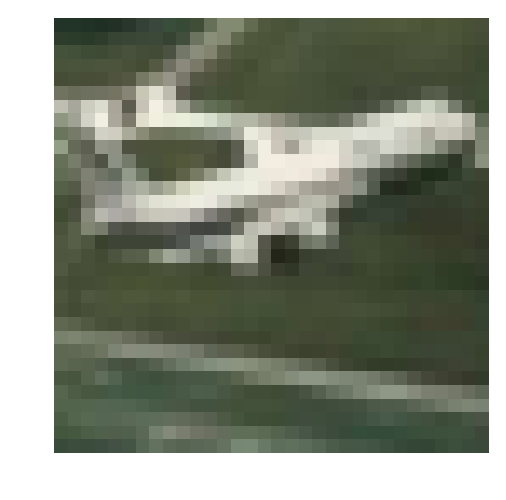

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 2
sample_id = 50
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    nx = x
    nx = nx / np.max(nx)
    
    return nx


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
lb.fit(range(10))

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    oh = lb.transform(x)

    return oh

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    x = tf.placeholder("float", [None, *image_shape], name='x')
    return x


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    y = tf.placeholder("float", [None, n_classes], name='y')
    return y


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    keep_prob = tf.placeholder("float", name='keep_prob')
    return keep_prob


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [8]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
#     print(conv_num_outputs)
#     print(conv_ksize)
#     print(conv_strides)
#     print(x_tensor.shape)
#     print(pool_ksize, pool_strides)
    
    input_depth = int(x_tensor.shape[-1])
    
#     print((*conv_ksize, input_depth, conv_num_outputs))
    
    # Filter (weights and bias)
    W = tf.Variable(tf.truncated_normal((*conv_ksize, input_depth, conv_num_outputs)))
    b = tf.Variable(tf.zeros(conv_num_outputs))
    
    padding = 'SAME'
    strides = [1, *conv_strides, 1]
    
    conv = tf.nn.conv2d(x_tensor, W, strides, padding) + b
    
    relu = tf.nn.relu(conv)
    
    ksize = [1, *pool_ksize, 1]
    strides = [1, *pool_strides, 1]
    padding = 'SAME'
    pool = tf.nn.max_pool(relu, ksize, strides, padding)
    
    return pool 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [9]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    flat = tf.layers.flatten(x_tensor)
    return flat


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [10]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    d = tf.layers.dense(x_tensor, num_outputs)
    return d


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [11]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    d = tf.layers.dense(x_tensor, num_outputs)
    return d


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [12]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    l1 = conv2d_maxpool(x, 64, (5,5), (1,1), (2,2), (2,2))  
    l2 = conv2d_maxpool(l1, 96, (3,3), (1,1), (2,2), (2,2))  
    l3 = conv2d_maxpool(l2, 144, (3,3), (1,1), (2,2), (2,2))  

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    l4 = flatten(l3)
    
    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    l5 = tf.nn.dropout(l4, keep_prob)
    l6 = fully_conn(l5, 10)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    l7 = output(l6, 10)
    
    # TODO: return output
    return l7


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [13]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [14]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    print('Loss:{}\tAccuracy:{}'.format(
        session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.0}),
        session.run(accuracy, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.0})
    ))

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [15]:
# TODO: Tune Parameters
epochs = 1500
batch_size = 1024
keep_probability = 0.7

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss:826.3058471679688	Accuracy:0.13861386477947235
Epoch  2, CIFAR-10 Batch 1:  Loss:594.0052490234375	Accuracy:0.17574258148670197
Epoch  3, CIFAR-10 Batch 1:  Loss:403.28216552734375	Accuracy:0.22772277891635895
Epoch  4, CIFAR-10 Batch 1:  Loss:300.4220886230469	Accuracy:0.2673267424106598
Epoch  5, CIFAR-10 Batch 1:  Loss:223.9955596923828	Accuracy:0.29826733469963074
Epoch  6, CIFAR-10 Batch 1:  Loss:191.09693908691406	Accuracy:0.3205445408821106
Epoch  7, CIFAR-10 Batch 1:  Loss:172.3162078857422	Accuracy:0.3304455578327179
Epoch  8, CIFAR-10 Batch 1:  Loss:154.07708740234375	Accuracy:0.3564356565475464
Epoch  9, CIFAR-10 Batch 1:  Loss:133.7661895751953	Accuracy:0.37871286273002625
Epoch 10, CIFAR-10 Batch 1:  Loss:117.82349395751953	Accuracy:0.38737624883651733
Epoch 11, CIFAR-10 Batch 1:  Loss:104.4644775390625	Accuracy:0.3948019742965698
Epoch 12, CIFAR-10 Batch 1:  Loss:92.16744995117188	Accuracy:0.3997

Epoch 102, CIFAR-10 Batch 1:  Loss:1.7839367389678955	Accuracy:0.38737624883651733
Epoch 103, CIFAR-10 Batch 1:  Loss:1.7822892665863037	Accuracy:0.3861386179924011
Epoch 104, CIFAR-10 Batch 1:  Loss:1.7765815258026123	Accuracy:0.3997524678707123
Epoch 105, CIFAR-10 Batch 1:  Loss:1.7723324298858643	Accuracy:0.40470296144485474
Epoch 106, CIFAR-10 Batch 1:  Loss:1.7701773643493652	Accuracy:0.37995049357414246
Epoch 107, CIFAR-10 Batch 1:  Loss:1.769848108291626	Accuracy:0.38737624883651733
Epoch 108, CIFAR-10 Batch 1:  Loss:1.770493507385254	Accuracy:0.38737624883651733
Epoch 109, CIFAR-10 Batch 1:  Loss:1.7591042518615723	Accuracy:0.38737624883651733
Epoch 110, CIFAR-10 Batch 1:  Loss:1.7547444105148315	Accuracy:0.39851483702659607
Epoch 111, CIFAR-10 Batch 1:  Loss:1.7530754804611206	Accuracy:0.40841585397720337
Epoch 112, CIFAR-10 Batch 1:  Loss:1.7425519227981567	Accuracy:0.3923267424106598
Epoch 113, CIFAR-10 Batch 1:  Loss:1.7445101737976074	Accuracy:0.3824257552623749
Epoch 114,

Epoch 202, CIFAR-10 Batch 1:  Loss:1.5233508348464966	Accuracy:0.44059404730796814
Epoch 203, CIFAR-10 Batch 1:  Loss:1.533790946006775	Accuracy:0.44059404730796814
Epoch 204, CIFAR-10 Batch 1:  Loss:1.513800024986267	Accuracy:0.4529702961444855
Epoch 205, CIFAR-10 Batch 1:  Loss:1.5236588716506958	Accuracy:0.4455445408821106
Epoch 206, CIFAR-10 Batch 1:  Loss:1.5208320617675781	Accuracy:0.4616336524486542
Epoch 207, CIFAR-10 Batch 1:  Loss:1.515215277671814	Accuracy:0.44925743341445923
Epoch 208, CIFAR-10 Batch 1:  Loss:1.5028027296066284	Accuracy:0.4715346395969391
Epoch 209, CIFAR-10 Batch 1:  Loss:1.503562092781067	Accuracy:0.4653465449810028
Epoch 210, CIFAR-10 Batch 1:  Loss:1.4978517293930054	Accuracy:0.4715346395969391
Epoch 211, CIFAR-10 Batch 1:  Loss:1.5091922283172607	Accuracy:0.4566831588745117
Epoch 212, CIFAR-10 Batch 1:  Loss:1.509859323501587	Accuracy:0.4566831588745117
Epoch 213, CIFAR-10 Batch 1:  Loss:1.4839979410171509	Accuracy:0.4740099012851715
Epoch 214, CIFAR-1

Epoch 303, CIFAR-10 Batch 1:  Loss:1.3657138347625732	Accuracy:0.5136138796806335
Epoch 304, CIFAR-10 Batch 1:  Loss:1.3742648363113403	Accuracy:0.5024752616882324
Epoch 305, CIFAR-10 Batch 1:  Loss:1.3634512424468994	Accuracy:0.5099009871482849
Epoch 306, CIFAR-10 Batch 1:  Loss:1.3591103553771973	Accuracy:0.521039605140686
Epoch 307, CIFAR-10 Batch 1:  Loss:1.368061900138855	Accuracy:0.5037128925323486
Epoch 308, CIFAR-10 Batch 1:  Loss:1.3624848127365112	Accuracy:0.521039605140686
Epoch 309, CIFAR-10 Batch 1:  Loss:1.3467711210250854	Accuracy:0.5358911156654358
Epoch 310, CIFAR-10 Batch 1:  Loss:1.3712571859359741	Accuracy:0.521039605140686
Epoch 311, CIFAR-10 Batch 1:  Loss:1.3537811040878296	Accuracy:0.521039605140686
Epoch 312, CIFAR-10 Batch 1:  Loss:1.338407039642334	Accuracy:0.5297029614448547
Epoch 313, CIFAR-10 Batch 1:  Loss:1.3445552587509155	Accuracy:0.5222772359848022
Epoch 314, CIFAR-10 Batch 1:  Loss:1.342111587524414	Accuracy:0.5445544719696045
Epoch 315, CIFAR-10 Bat

Epoch 404, CIFAR-10 Batch 1:  Loss:1.227392315864563	Accuracy:0.573019802570343
Epoch 405, CIFAR-10 Batch 1:  Loss:1.2094447612762451	Accuracy:0.5693069100379944
Epoch 406, CIFAR-10 Batch 1:  Loss:1.2156575918197632	Accuracy:0.5643564462661743
Epoch 407, CIFAR-10 Batch 1:  Loss:1.2059895992279053	Accuracy:0.5903465151786804
Epoch 408, CIFAR-10 Batch 1:  Loss:1.199983835220337	Accuracy:0.5866336822509766
Epoch 409, CIFAR-10 Batch 1:  Loss:1.2011756896972656	Accuracy:0.5891088843345642
Epoch 410, CIFAR-10 Batch 1:  Loss:1.2041847705841064	Accuracy:0.5643564462661743
Epoch 411, CIFAR-10 Batch 1:  Loss:1.2029389142990112	Accuracy:0.5816831588745117
Epoch 412, CIFAR-10 Batch 1:  Loss:1.192395806312561	Accuracy:0.5779703259468079
Epoch 413, CIFAR-10 Batch 1:  Loss:1.1990633010864258	Accuracy:0.5878713130950928
Epoch 414, CIFAR-10 Batch 1:  Loss:1.1970233917236328	Accuracy:0.5556930899620056
Epoch 415, CIFAR-10 Batch 1:  Loss:1.1964809894561768	Accuracy:0.5915841460227966
Epoch 416, CIFAR-10 

Epoch 505, CIFAR-10 Batch 1:  Loss:1.0843594074249268	Accuracy:0.6200494766235352
Epoch 506, CIFAR-10 Batch 1:  Loss:1.0731728076934814	Accuracy:0.6212871074676514
Epoch 507, CIFAR-10 Batch 1:  Loss:1.0730949640274048	Accuracy:0.6410890817642212
Epoch 508, CIFAR-10 Batch 1:  Loss:1.0921695232391357	Accuracy:0.6225247383117676
Epoch 509, CIFAR-10 Batch 1:  Loss:1.0820735692977905	Accuracy:0.6299505233764648
Epoch 510, CIFAR-10 Batch 1:  Loss:1.0664138793945312	Accuracy:0.6349009871482849
Epoch 511, CIFAR-10 Batch 1:  Loss:1.0665336847305298	Accuracy:0.6299505233764648
Epoch 512, CIFAR-10 Batch 1:  Loss:1.0670074224472046	Accuracy:0.625
Epoch 513, CIFAR-10 Batch 1:  Loss:1.0751065015792847	Accuracy:0.6237623691558838
Epoch 514, CIFAR-10 Batch 1:  Loss:1.0557178258895874	Accuracy:0.6386138796806335
Epoch 515, CIFAR-10 Batch 1:  Loss:1.0712260007858276	Accuracy:0.6287128925323486
Epoch 516, CIFAR-10 Batch 1:  Loss:1.076284408569336	Accuracy:0.6150990128517151
Epoch 517, CIFAR-10 Batch 1:  

Epoch 606, CIFAR-10 Batch 1:  Loss:0.9851791858673096	Accuracy:0.6584158539772034
Epoch 607, CIFAR-10 Batch 1:  Loss:0.9647640585899353	Accuracy:0.6547029614448547
Epoch 608, CIFAR-10 Batch 1:  Loss:0.9479911923408508	Accuracy:0.6596534848213196
Epoch 609, CIFAR-10 Batch 1:  Loss:0.9483396410942078	Accuracy:0.6658415794372559
Epoch 610, CIFAR-10 Batch 1:  Loss:0.9459068179130554	Accuracy:0.6782178282737732
Epoch 611, CIFAR-10 Batch 1:  Loss:0.9419288039207458	Accuracy:0.676980197429657
Epoch 612, CIFAR-10 Batch 1:  Loss:0.9550060629844666	Accuracy:0.6670792102813721
Epoch 613, CIFAR-10 Batch 1:  Loss:0.9634565711021423	Accuracy:0.655940592288971
Epoch 614, CIFAR-10 Batch 1:  Loss:0.9507676959037781	Accuracy:0.6695544719696045
Epoch 615, CIFAR-10 Batch 1:  Loss:0.9609505534172058	Accuracy:0.6534653306007385
Epoch 616, CIFAR-10 Batch 1:  Loss:0.9359517693519592	Accuracy:0.6683168411254883
Epoch 617, CIFAR-10 Batch 1:  Loss:0.9502506852149963	Accuracy:0.6633663177490234
Epoch 618, CIFAR-1

Epoch 707, CIFAR-10 Batch 1:  Loss:0.8464915752410889	Accuracy:0.7091584205627441
Epoch 708, CIFAR-10 Batch 1:  Loss:0.8593170642852783	Accuracy:0.7054455280303955
Epoch 709, CIFAR-10 Batch 1:  Loss:0.8508632183074951	Accuracy:0.7054455280303955
Epoch 710, CIFAR-10 Batch 1:  Loss:0.8561089634895325	Accuracy:0.6992574334144592
Epoch 711, CIFAR-10 Batch 1:  Loss:0.849274754524231	Accuracy:0.7091584205627441
Epoch 712, CIFAR-10 Batch 1:  Loss:0.8677206039428711	Accuracy:0.7091584205627441
Epoch 713, CIFAR-10 Batch 1:  Loss:0.8457486033439636	Accuracy:0.7165841460227966
Epoch 714, CIFAR-10 Batch 1:  Loss:0.8555222153663635	Accuracy:0.6856435537338257
Epoch 715, CIFAR-10 Batch 1:  Loss:0.8563459515571594	Accuracy:0.7004950642585754
Epoch 716, CIFAR-10 Batch 1:  Loss:0.8448358774185181	Accuracy:0.7103960514068604
Epoch 717, CIFAR-10 Batch 1:  Loss:0.8462294936180115	Accuracy:0.7004950642585754
Epoch 718, CIFAR-10 Batch 1:  Loss:0.8395175933837891	Accuracy:0.7153465151786804
Epoch 719, CIFAR-

Epoch 808, CIFAR-10 Batch 1:  Loss:0.7400178909301758	Accuracy:0.7438119053840637
Epoch 809, CIFAR-10 Batch 1:  Loss:0.7575746774673462	Accuracy:0.7438119053840637
Epoch 810, CIFAR-10 Batch 1:  Loss:0.7602759003639221	Accuracy:0.7512376308441162
Epoch 811, CIFAR-10 Batch 1:  Loss:0.7353163361549377	Accuracy:0.7611386179924011
Epoch 812, CIFAR-10 Batch 1:  Loss:0.7316663265228271	Accuracy:0.7574257254600525
Epoch 813, CIFAR-10 Batch 1:  Loss:0.739794135093689	Accuracy:0.7648515105247498
Epoch 814, CIFAR-10 Batch 1:  Loss:0.7408187985420227	Accuracy:0.7462871074676514
Epoch 815, CIFAR-10 Batch 1:  Loss:0.7408156394958496	Accuracy:0.7537128925323486
Epoch 816, CIFAR-10 Batch 1:  Loss:0.7345582842826843	Accuracy:0.7561880946159363
Epoch 817, CIFAR-10 Batch 1:  Loss:0.7475420236587524	Accuracy:0.7438119053840637
Epoch 818, CIFAR-10 Batch 1:  Loss:0.7414873838424683	Accuracy:0.7574257254600525
Epoch 819, CIFAR-10 Batch 1:  Loss:0.7347157597541809	Accuracy:0.7599009871482849
Epoch 820, CIFAR-

Epoch 909, CIFAR-10 Batch 1:  Loss:0.6544935703277588	Accuracy:0.7772276997566223
Epoch 910, CIFAR-10 Batch 1:  Loss:0.6464170813560486	Accuracy:0.7846534848213196
Epoch 911, CIFAR-10 Batch 1:  Loss:0.6458530426025391	Accuracy:0.7933168411254883
Epoch 912, CIFAR-10 Batch 1:  Loss:0.637320339679718	Accuracy:0.7784653306007385
Epoch 913, CIFAR-10 Batch 1:  Loss:0.6397931575775146	Accuracy:0.7858911156654358
Epoch 914, CIFAR-10 Batch 1:  Loss:0.6409754157066345	Accuracy:0.7821782231330872
Epoch 915, CIFAR-10 Batch 1:  Loss:0.6426360011100769	Accuracy:0.7821782231330872
Epoch 916, CIFAR-10 Batch 1:  Loss:0.6319267153739929	Accuracy:0.7834158539772034
Epoch 917, CIFAR-10 Batch 1:  Loss:0.641510009765625	Accuracy:0.7747524976730347
Epoch 918, CIFAR-10 Batch 1:  Loss:0.6347062587738037	Accuracy:0.7834158539772034
Epoch 919, CIFAR-10 Batch 1:  Loss:0.6305405497550964	Accuracy:0.7920792102813721
Epoch 920, CIFAR-10 Batch 1:  Loss:0.6486130356788635	Accuracy:0.780940592288971
Epoch 921, CIFAR-10

Epoch 1010, CIFAR-10 Batch 1:  Loss:0.5600406527519226	Accuracy:0.8155940771102905
Epoch 1011, CIFAR-10 Batch 1:  Loss:0.571729302406311	Accuracy:0.8007425665855408
Epoch 1012, CIFAR-10 Batch 1:  Loss:0.5786126255989075	Accuracy:0.8081682920455933
Epoch 1013, CIFAR-10 Batch 1:  Loss:0.5637978315353394	Accuracy:0.8094059228897095
Epoch 1014, CIFAR-10 Batch 1:  Loss:0.5744070410728455	Accuracy:0.8131188154220581
Epoch 1015, CIFAR-10 Batch 1:  Loss:0.5742250680923462	Accuracy:0.7995049357414246
Epoch 1016, CIFAR-10 Batch 1:  Loss:0.5636478662490845	Accuracy:0.8081682920455933
Epoch 1017, CIFAR-10 Batch 1:  Loss:0.5530430674552917	Accuracy:0.8081682920455933
Epoch 1018, CIFAR-10 Batch 1:  Loss:0.5520672798156738	Accuracy:0.8193069100379944
Epoch 1019, CIFAR-10 Batch 1:  Loss:0.545925498008728	Accuracy:0.8193069100379944
Epoch 1020, CIFAR-10 Batch 1:  Loss:0.5717024803161621	Accuracy:0.8131188154220581
Epoch 1021, CIFAR-10 Batch 1:  Loss:0.556853175163269	Accuracy:0.8168317079544067
Epoch 1

Epoch 1109, CIFAR-10 Batch 1:  Loss:0.487001895904541	Accuracy:0.8465346693992615
Epoch 1110, CIFAR-10 Batch 1:  Loss:0.4793646037578583	Accuracy:0.8415841460227966
Epoch 1111, CIFAR-10 Batch 1:  Loss:0.49251222610473633	Accuracy:0.8366336822509766
Epoch 1112, CIFAR-10 Batch 1:  Loss:0.48866596817970276	Accuracy:0.8378713130950928
Epoch 1113, CIFAR-10 Batch 1:  Loss:0.48961329460144043	Accuracy:0.8391088843345642
Epoch 1114, CIFAR-10 Batch 1:  Loss:0.47811058163642883	Accuracy:0.8366336822509766
Epoch 1115, CIFAR-10 Batch 1:  Loss:0.4775752127170563	Accuracy:0.8490098714828491
Epoch 1116, CIFAR-10 Batch 1:  Loss:0.4719173014163971	Accuracy:0.8403465151786804
Epoch 1117, CIFAR-10 Batch 1:  Loss:0.4917868375778198	Accuracy:0.8403465151786804
Epoch 1118, CIFAR-10 Batch 1:  Loss:0.48872557282447815	Accuracy:0.8428217768669128
Epoch 1119, CIFAR-10 Batch 1:  Loss:0.4849737584590912	Accuracy:0.8403465151786804
Epoch 1120, CIFAR-10 Batch 1:  Loss:0.47292500734329224	Accuracy:0.8415841460227966

Epoch 1208, CIFAR-10 Batch 1:  Loss:0.41518500447273254	Accuracy:0.8576732873916626
Epoch 1209, CIFAR-10 Batch 1:  Loss:0.4303397834300995	Accuracy:0.8638613820075989
Epoch 1210, CIFAR-10 Batch 1:  Loss:0.4168691337108612	Accuracy:0.8626237511634827
Epoch 1211, CIFAR-10 Batch 1:  Loss:0.42775362730026245	Accuracy:0.8589109182357788
Epoch 1212, CIFAR-10 Batch 1:  Loss:0.41990000009536743	Accuracy:0.8551980257034302
Epoch 1213, CIFAR-10 Batch 1:  Loss:0.43484172224998474	Accuracy:0.8576732873916626
Epoch 1214, CIFAR-10 Batch 1:  Loss:0.41408225893974304	Accuracy:0.8589109182357788
Epoch 1215, CIFAR-10 Batch 1:  Loss:0.41221460700035095	Accuracy:0.8712871074676514
Epoch 1216, CIFAR-10 Batch 1:  Loss:0.42583563923835754	Accuracy:0.875
Epoch 1217, CIFAR-10 Batch 1:  Loss:0.4214782416820526	Accuracy:0.8700494766235352
Epoch 1218, CIFAR-10 Batch 1:  Loss:0.4205583333969116	Accuracy:0.8626237511634827
Epoch 1219, CIFAR-10 Batch 1:  Loss:0.4150471091270447	Accuracy:0.8811880946159363
Epoch 1220

Epoch 1308, CIFAR-10 Batch 1:  Loss:0.37227684259414673	Accuracy:0.8799505233764648
Epoch 1309, CIFAR-10 Batch 1:  Loss:0.35926511883735657	Accuracy:0.896039605140686
Epoch 1310, CIFAR-10 Batch 1:  Loss:0.36855611205101013	Accuracy:0.8873762488365173
Epoch 1311, CIFAR-10 Batch 1:  Loss:0.373494416475296	Accuracy:0.8849009871482849
Epoch 1312, CIFAR-10 Batch 1:  Loss:0.3873341679573059	Accuracy:0.8774752616882324
Epoch 1313, CIFAR-10 Batch 1:  Loss:0.3573686480522156	Accuracy:0.8836633563041687
Epoch 1314, CIFAR-10 Batch 1:  Loss:0.39788568019866943	Accuracy:0.8774752616882324
Epoch 1315, CIFAR-10 Batch 1:  Loss:0.35514333844184875	Accuracy:0.8972772359848022
Epoch 1316, CIFAR-10 Batch 1:  Loss:0.3835355043411255	Accuracy:0.8799505233764648
Epoch 1317, CIFAR-10 Batch 1:  Loss:0.3647293150424957	Accuracy:0.8787128925323486
Epoch 1318, CIFAR-10 Batch 1:  Loss:0.3800223767757416	Accuracy:0.8861386179924011
Epoch 1319, CIFAR-10 Batch 1:  Loss:0.36955589056015015	Accuracy:0.8824257254600525


Epoch 1407, CIFAR-10 Batch 1:  Loss:0.31207871437072754	Accuracy:0.9121286869049072
Epoch 1408, CIFAR-10 Batch 1:  Loss:0.334145724773407	Accuracy:0.9034653306007385
Epoch 1409, CIFAR-10 Batch 1:  Loss:0.3184705972671509	Accuracy:0.9034653306007385
Epoch 1410, CIFAR-10 Batch 1:  Loss:0.3332383632659912	Accuracy:0.9146039485931396
Epoch 1411, CIFAR-10 Batch 1:  Loss:0.31941401958465576	Accuracy:0.9158415794372559
Epoch 1412, CIFAR-10 Batch 1:  Loss:0.3132524788379669	Accuracy:0.9096534848213196
Epoch 1413, CIFAR-10 Batch 1:  Loss:0.3132059574127197	Accuracy:0.9096534848213196
Epoch 1414, CIFAR-10 Batch 1:  Loss:0.338543176651001	Accuracy:0.9071782231330872
Epoch 1415, CIFAR-10 Batch 1:  Loss:0.3091208338737488	Accuracy:0.9133663177490234
Epoch 1416, CIFAR-10 Batch 1:  Loss:0.31347617506980896	Accuracy:0.9146039485931396
Epoch 1417, CIFAR-10 Batch 1:  Loss:0.3041797876358032	Accuracy:0.9158415794372559
Epoch 1418, CIFAR-10 Batch 1:  Loss:0.3160874843597412	Accuracy:0.905940592288971
Epoc

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss:1455.554931640625	Accuracy:0.09405940771102905
Epoch  1, CIFAR-10 Batch 2:  Loss:995.7568969726562	Accuracy:0.15470297634601593
Epoch  1, CIFAR-10 Batch 3:  Loss:530.815185546875	Accuracy:0.2054455429315567
Epoch  1, CIFAR-10 Batch 4:  Loss:454.10223388671875	Accuracy:0.20173268020153046
Epoch  1, CIFAR-10 Batch 5:  Loss:372.3489990234375	Accuracy:0.2660891115665436
Epoch  2, CIFAR-10 Batch 1:  Loss:296.1826171875	Accuracy:0.2858910858631134
Epoch  2, CIFAR-10 Batch 2:  Loss:249.72164916992188	Accuracy:0.31806930899620056
Epoch  2, CIFAR-10 Batch 3:  Loss:222.79180908203125	Accuracy:0.33292078971862793
Epoch  2, CIFAR-10 Batch 4:  Loss:189.1532745361328	Accuracy:0.35148516297340393
Epoch  2, CIFAR-10 Batch 5:  Loss:189.24044799804688	Accuracy:0.36138615012168884
Epoch  3, CIFAR-10 Batch 1:  Loss:163.03036499023438	Accuracy:0.3725247383117676
Epoch  3, CIFAR-10 Batch 2:  Loss:151.79957580566406	Accuracy:0.37128713726997375
Epoch  3, CIFAR-10

Epoch 21, CIFAR-10 Batch 3:  Loss:1.9401289224624634	Accuracy:0.31806930899620056
Epoch 21, CIFAR-10 Batch 4:  Loss:2.030229330062866	Accuracy:0.31683167815208435
Epoch 21, CIFAR-10 Batch 5:  Loss:2.000880718231201	Accuracy:0.29950493574142456
Epoch 22, CIFAR-10 Batch 1:  Loss:1.9760245084762573	Accuracy:0.32549506425857544
Epoch 22, CIFAR-10 Batch 2:  Loss:1.9863544702529907	Accuracy:0.30816832184791565
Epoch 22, CIFAR-10 Batch 3:  Loss:1.9189056158065796	Accuracy:0.31559404730796814
Epoch 22, CIFAR-10 Batch 4:  Loss:1.9909589290618896	Accuracy:0.3205445408821106
Epoch 22, CIFAR-10 Batch 5:  Loss:1.9742974042892456	Accuracy:0.3044554591178894
Epoch 23, CIFAR-10 Batch 1:  Loss:1.9571712017059326	Accuracy:0.3316831588745117
Epoch 23, CIFAR-10 Batch 2:  Loss:1.9813103675842285	Accuracy:0.3131188154220581
Epoch 23, CIFAR-10 Batch 3:  Loss:1.8907814025878906	Accuracy:0.3205445408821106
Epoch 23, CIFAR-10 Batch 4:  Loss:1.9798369407653809	Accuracy:0.33292078971862793
Epoch 23, CIFAR-10 Batc

Epoch 41, CIFAR-10 Batch 5:  Loss:1.776867389678955	Accuracy:0.34158414602279663
Epoch 42, CIFAR-10 Batch 1:  Loss:1.7353769540786743	Accuracy:0.375
Epoch 42, CIFAR-10 Batch 2:  Loss:1.7767226696014404	Accuracy:0.3675742447376251
Epoch 42, CIFAR-10 Batch 3:  Loss:1.6968269348144531	Accuracy:0.4009900987148285
Epoch 42, CIFAR-10 Batch 4:  Loss:1.7589688301086426	Accuracy:0.3663366436958313
Epoch 42, CIFAR-10 Batch 5:  Loss:1.762008786201477	Accuracy:0.36138615012168884
Epoch 43, CIFAR-10 Batch 1:  Loss:1.7309331893920898	Accuracy:0.3725247383117676
Epoch 43, CIFAR-10 Batch 2:  Loss:1.772528052330017	Accuracy:0.3564356565475464
Epoch 43, CIFAR-10 Batch 3:  Loss:1.7019952535629272	Accuracy:0.3997524678707123
Epoch 43, CIFAR-10 Batch 4:  Loss:1.7497658729553223	Accuracy:0.3737623691558838
Epoch 43, CIFAR-10 Batch 5:  Loss:1.7605425119400024	Accuracy:0.3576732575893402
Epoch 44, CIFAR-10 Batch 1:  Loss:1.7172478437423706	Accuracy:0.38737624883651733
Epoch 44, CIFAR-10 Batch 2:  Loss:1.77232

Epoch 62, CIFAR-10 Batch 2:  Loss:1.6783521175384521	Accuracy:0.3923267424106598
Epoch 62, CIFAR-10 Batch 3:  Loss:1.611274242401123	Accuracy:0.4220297038555145
Epoch 62, CIFAR-10 Batch 4:  Loss:1.637560248374939	Accuracy:0.40717822313308716
Epoch 62, CIFAR-10 Batch 5:  Loss:1.6713194847106934	Accuracy:0.4022277295589447
Epoch 63, CIFAR-10 Batch 1:  Loss:1.6358319520950317	Accuracy:0.426980197429657
Epoch 63, CIFAR-10 Batch 2:  Loss:1.6675227880477905	Accuracy:0.41707921028137207
Epoch 63, CIFAR-10 Batch 3:  Loss:1.6209206581115723	Accuracy:0.4195544421672821
Epoch 63, CIFAR-10 Batch 4:  Loss:1.6448215246200562	Accuracy:0.4022277295589447
Epoch 63, CIFAR-10 Batch 5:  Loss:1.6663551330566406	Accuracy:0.38985148072242737
Epoch 64, CIFAR-10 Batch 1:  Loss:1.6353096961975098	Accuracy:0.41460394859313965
Epoch 64, CIFAR-10 Batch 2:  Loss:1.6796104907989502	Accuracy:0.4096534550189972
Epoch 64, CIFAR-10 Batch 3:  Loss:1.6152417659759521	Accuracy:0.42326733469963074
Epoch 64, CIFAR-10 Batch 4

Epoch 82, CIFAR-10 Batch 4:  Loss:1.6109827756881714	Accuracy:0.3997524678707123
Epoch 82, CIFAR-10 Batch 5:  Loss:1.5962146520614624	Accuracy:0.4220297038555145
Epoch 83, CIFAR-10 Batch 1:  Loss:1.567348837852478	Accuracy:0.4356435537338257
Epoch 83, CIFAR-10 Batch 2:  Loss:1.6238670349121094	Accuracy:0.42450493574142456
Epoch 83, CIFAR-10 Batch 3:  Loss:1.5448659658432007	Accuracy:0.4381188154220581
Epoch 83, CIFAR-10 Batch 4:  Loss:1.6022672653198242	Accuracy:0.4183168411254883
Epoch 83, CIFAR-10 Batch 5:  Loss:1.5973182916641235	Accuracy:0.41460394859313965
Epoch 84, CIFAR-10 Batch 1:  Loss:1.5673354864120483	Accuracy:0.43316832184791565
Epoch 84, CIFAR-10 Batch 2:  Loss:1.6229151487350464	Accuracy:0.4282178282737732
Epoch 84, CIFAR-10 Batch 3:  Loss:1.5472378730773926	Accuracy:0.42574256658554077
Epoch 84, CIFAR-10 Batch 4:  Loss:1.5853188037872314	Accuracy:0.4195544421672821
Epoch 84, CIFAR-10 Batch 5:  Loss:1.5835695266723633	Accuracy:0.41707921028137207
Epoch 85, CIFAR-10 Batch

Epoch 102, CIFAR-10 Batch 5:  Loss:1.5241031646728516	Accuracy:0.4381188154220581
Epoch 103, CIFAR-10 Batch 1:  Loss:1.5323699712753296	Accuracy:0.4368811845779419
Epoch 103, CIFAR-10 Batch 2:  Loss:1.5731309652328491	Accuracy:0.4195544421672821
Epoch 103, CIFAR-10 Batch 3:  Loss:1.5015302896499634	Accuracy:0.4542079269886017
Epoch 103, CIFAR-10 Batch 4:  Loss:1.5427685976028442	Accuracy:0.4368811845779419
Epoch 103, CIFAR-10 Batch 5:  Loss:1.5186727046966553	Accuracy:0.45049506425857544
Epoch 104, CIFAR-10 Batch 1:  Loss:1.530766248703003	Accuracy:0.4294554591178894
Epoch 104, CIFAR-10 Batch 2:  Loss:1.5727506875991821	Accuracy:0.42450493574142456
Epoch 104, CIFAR-10 Batch 3:  Loss:1.50552237033844	Accuracy:0.4467821717262268
Epoch 104, CIFAR-10 Batch 4:  Loss:1.536336064338684	Accuracy:0.44059404730796814
Epoch 104, CIFAR-10 Batch 5:  Loss:1.5176502466201782	Accuracy:0.4554455578327179
Epoch 105, CIFAR-10 Batch 1:  Loss:1.5091568231582642	Accuracy:0.4542079269886017
Epoch 105, CIFAR-

Epoch 122, CIFAR-10 Batch 5:  Loss:1.459218144416809	Accuracy:0.47029703855514526
Epoch 123, CIFAR-10 Batch 1:  Loss:1.460424542427063	Accuracy:0.47896039485931396
Epoch 123, CIFAR-10 Batch 2:  Loss:1.5167096853256226	Accuracy:0.43440595269203186
Epoch 123, CIFAR-10 Batch 3:  Loss:1.4257537126541138	Accuracy:0.4628712832927704
Epoch 123, CIFAR-10 Batch 4:  Loss:1.4816958904266357	Accuracy:0.4653465449810028
Epoch 123, CIFAR-10 Batch 5:  Loss:1.4535537958145142	Accuracy:0.46905940771102905
Epoch 124, CIFAR-10 Batch 1:  Loss:1.4679781198501587	Accuracy:0.4641089141368866
Epoch 124, CIFAR-10 Batch 2:  Loss:1.4946012496948242	Accuracy:0.45173266530036926
Epoch 124, CIFAR-10 Batch 3:  Loss:1.431802749633789	Accuracy:0.4727722704410553
Epoch 124, CIFAR-10 Batch 4:  Loss:1.5000813007354736	Accuracy:0.4715346395969391
Epoch 124, CIFAR-10 Batch 5:  Loss:1.454146385192871	Accuracy:0.4653465449810028
Epoch 125, CIFAR-10 Batch 1:  Loss:1.4573229551315308	Accuracy:0.47896039485931396
Epoch 125, CIF

Epoch 142, CIFAR-10 Batch 5:  Loss:1.4069738388061523	Accuracy:0.49628713726997375
Epoch 143, CIFAR-10 Batch 1:  Loss:1.4136334657669067	Accuracy:0.4801980257034302
Epoch 143, CIFAR-10 Batch 2:  Loss:1.42816960811615	Accuracy:0.47648516297340393
Epoch 143, CIFAR-10 Batch 3:  Loss:1.3752027750015259	Accuracy:0.4987623691558838
Epoch 143, CIFAR-10 Batch 4:  Loss:1.4253010749816895	Accuracy:0.4925742447376251
Epoch 143, CIFAR-10 Batch 5:  Loss:1.3948249816894531	Accuracy:0.5061880946159363
Epoch 144, CIFAR-10 Batch 1:  Loss:1.4155418872833252	Accuracy:0.46905940771102905
Epoch 144, CIFAR-10 Batch 2:  Loss:1.4474554061889648	Accuracy:0.4814356565475464
Epoch 144, CIFAR-10 Batch 3:  Loss:1.3731589317321777	Accuracy:0.5
Epoch 144, CIFAR-10 Batch 4:  Loss:1.4235504865646362	Accuracy:0.48638615012168884
Epoch 144, CIFAR-10 Batch 5:  Loss:1.391507863998413	Accuracy:0.5160890817642212
Epoch 145, CIFAR-10 Batch 1:  Loss:1.4027405977249146	Accuracy:0.4913366436958313
Epoch 145, CIFAR-10 Batch 2:  

Epoch 163, CIFAR-10 Batch 1:  Loss:1.3530707359313965	Accuracy:0.4913366436958313
Epoch 163, CIFAR-10 Batch 2:  Loss:1.3733296394348145	Accuracy:0.4925742447376251
Epoch 163, CIFAR-10 Batch 3:  Loss:1.3271503448486328	Accuracy:0.5061880946159363
Epoch 163, CIFAR-10 Batch 4:  Loss:1.3583807945251465	Accuracy:0.5136138796806335
Epoch 163, CIFAR-10 Batch 5:  Loss:1.3372160196304321	Accuracy:0.5371286869049072
Epoch 164, CIFAR-10 Batch 1:  Loss:1.3671164512634277	Accuracy:0.4814356565475464
Epoch 164, CIFAR-10 Batch 2:  Loss:1.3692682981491089	Accuracy:0.5185643434524536
Epoch 164, CIFAR-10 Batch 3:  Loss:1.3236011266708374	Accuracy:0.5012376308441162
Epoch 164, CIFAR-10 Batch 4:  Loss:1.3599708080291748	Accuracy:0.5061880946159363
Epoch 164, CIFAR-10 Batch 5:  Loss:1.338415503501892	Accuracy:0.5198019742965698
Epoch 165, CIFAR-10 Batch 1:  Loss:1.368214726448059	Accuracy:0.47896039485931396
Epoch 165, CIFAR-10 Batch 2:  Loss:1.356247067451477	Accuracy:0.5160890817642212
Epoch 165, CIFAR-1

Epoch 183, CIFAR-10 Batch 2:  Loss:1.290677547454834	Accuracy:0.5457921028137207
Epoch 183, CIFAR-10 Batch 3:  Loss:1.2647477388381958	Accuracy:0.5334158539772034
Epoch 183, CIFAR-10 Batch 4:  Loss:1.2876087427139282	Accuracy:0.5433168411254883
Epoch 183, CIFAR-10 Batch 5:  Loss:1.2621721029281616	Accuracy:0.5371286869049072
Epoch 184, CIFAR-10 Batch 1:  Loss:1.3144395351409912	Accuracy:0.5222772359848022
Epoch 184, CIFAR-10 Batch 2:  Loss:1.2924323081970215	Accuracy:0.5247524976730347
Epoch 184, CIFAR-10 Batch 3:  Loss:1.288869023323059	Accuracy:0.5136138796806335
Epoch 184, CIFAR-10 Batch 4:  Loss:1.2947653532028198	Accuracy:0.5420792102813721
Epoch 184, CIFAR-10 Batch 5:  Loss:1.2459543943405151	Accuracy:0.5643564462661743
Epoch 185, CIFAR-10 Batch 1:  Loss:1.3060598373413086	Accuracy:0.5049505233764648
Epoch 185, CIFAR-10 Batch 2:  Loss:1.2839373350143433	Accuracy:0.5396039485931396
Epoch 185, CIFAR-10 Batch 3:  Loss:1.2755558490753174	Accuracy:0.5272276997566223
Epoch 185, CIFAR-1

Epoch 203, CIFAR-10 Batch 3:  Loss:1.2261015176773071	Accuracy:0.5482673048973083
Epoch 203, CIFAR-10 Batch 4:  Loss:1.2191940546035767	Accuracy:0.5705445408821106
Epoch 203, CIFAR-10 Batch 5:  Loss:1.1887516975402832	Accuracy:0.5829207897186279
Epoch 204, CIFAR-10 Batch 1:  Loss:1.265346646308899	Accuracy:0.5222772359848022
Epoch 204, CIFAR-10 Batch 2:  Loss:1.243534803390503	Accuracy:0.5556930899620056
Epoch 204, CIFAR-10 Batch 3:  Loss:1.216707468032837	Accuracy:0.5594059228897095
Epoch 204, CIFAR-10 Batch 4:  Loss:1.2237577438354492	Accuracy:0.5717821717262268
Epoch 204, CIFAR-10 Batch 5:  Loss:1.1847046613693237	Accuracy:0.573019802570343
Epoch 205, CIFAR-10 Batch 1:  Loss:1.254643201828003	Accuracy:0.5284653306007385
Epoch 205, CIFAR-10 Batch 2:  Loss:1.2191112041473389	Accuracy:0.5581682920455933
Epoch 205, CIFAR-10 Batch 3:  Loss:1.2315267324447632	Accuracy:0.5544554591178894
Epoch 205, CIFAR-10 Batch 4:  Loss:1.2077021598815918	Accuracy:0.5655940771102905
Epoch 205, CIFAR-10 B

Epoch 223, CIFAR-10 Batch 4:  Loss:1.1724148988723755	Accuracy:0.5878713130950928
Epoch 223, CIFAR-10 Batch 5:  Loss:1.120017409324646	Accuracy:0.6027227640151978
Epoch 224, CIFAR-10 Batch 1:  Loss:1.2049063444137573	Accuracy:0.5495049357414246
Epoch 224, CIFAR-10 Batch 2:  Loss:1.1803644895553589	Accuracy:0.5779703259468079
Epoch 224, CIFAR-10 Batch 3:  Loss:1.1786420345306396	Accuracy:0.5705445408821106
Epoch 224, CIFAR-10 Batch 4:  Loss:1.1720635890960693	Accuracy:0.5866336822509766
Epoch 224, CIFAR-10 Batch 5:  Loss:1.1152945756912231	Accuracy:0.6113861203193665
Epoch 225, CIFAR-10 Batch 1:  Loss:1.1954710483551025	Accuracy:0.5420792102813721
Epoch 225, CIFAR-10 Batch 2:  Loss:1.1900043487548828	Accuracy:0.5792078971862793
Epoch 225, CIFAR-10 Batch 3:  Loss:1.1794424057006836	Accuracy:0.5705445408821106
Epoch 225, CIFAR-10 Batch 4:  Loss:1.1775435209274292	Accuracy:0.5928217768669128
Epoch 225, CIFAR-10 Batch 5:  Loss:1.1173478364944458	Accuracy:0.5891088843345642
Epoch 226, CIFAR-

Epoch 243, CIFAR-10 Batch 5:  Loss:1.080599308013916	Accuracy:0.6163366436958313
Epoch 244, CIFAR-10 Batch 1:  Loss:1.1592226028442383	Accuracy:0.5569307208061218
Epoch 244, CIFAR-10 Batch 2:  Loss:1.1198989152908325	Accuracy:0.6076732873916626
Epoch 244, CIFAR-10 Batch 3:  Loss:1.1167199611663818	Accuracy:0.603960394859314
Epoch 244, CIFAR-10 Batch 4:  Loss:1.1257249116897583	Accuracy:0.5977723002433777
Epoch 244, CIFAR-10 Batch 5:  Loss:1.084867238998413	Accuracy:0.6311880946159363
Epoch 245, CIFAR-10 Batch 1:  Loss:1.1620595455169678	Accuracy:0.5569307208061218
Epoch 245, CIFAR-10 Batch 2:  Loss:1.1214234828948975	Accuracy:0.5866336822509766
Epoch 245, CIFAR-10 Batch 3:  Loss:1.1202818155288696	Accuracy:0.5952970385551453
Epoch 245, CIFAR-10 Batch 4:  Loss:1.121910572052002	Accuracy:0.5977723002433777
Epoch 245, CIFAR-10 Batch 5:  Loss:1.0739028453826904	Accuracy:0.6287128925323486
Epoch 246, CIFAR-10 Batch 1:  Loss:1.142661213874817	Accuracy:0.5816831588745117
Epoch 246, CIFAR-10 B

Epoch 264, CIFAR-10 Batch 1:  Loss:1.1274477243423462	Accuracy:0.5829207897186279
Epoch 264, CIFAR-10 Batch 2:  Loss:1.0890229940414429	Accuracy:0.6349009871482849
Epoch 264, CIFAR-10 Batch 3:  Loss:1.0764236450195312	Accuracy:0.6188119053840637
Epoch 264, CIFAR-10 Batch 4:  Loss:1.0826882123947144	Accuracy:0.6175742745399475
Epoch 264, CIFAR-10 Batch 5:  Loss:1.032550573348999	Accuracy:0.6287128925323486
Epoch 265, CIFAR-10 Batch 1:  Loss:1.123874306678772	Accuracy:0.5915841460227966
Epoch 265, CIFAR-10 Batch 2:  Loss:1.0692520141601562	Accuracy:0.6225247383117676
Epoch 265, CIFAR-10 Batch 3:  Loss:1.0766948461532593	Accuracy:0.603960394859314
Epoch 265, CIFAR-10 Batch 4:  Loss:1.0840234756469727	Accuracy:0.6126237511634827
Epoch 265, CIFAR-10 Batch 5:  Loss:1.0134680271148682	Accuracy:0.6361386179924011
Epoch 266, CIFAR-10 Batch 1:  Loss:1.1119297742843628	Accuracy:0.5866336822509766
Epoch 266, CIFAR-10 Batch 2:  Loss:1.0621397495269775	Accuracy:0.6200494766235352
Epoch 266, CIFAR-10

Epoch 284, CIFAR-10 Batch 2:  Loss:1.0072839260101318	Accuracy:0.6497524976730347
Epoch 284, CIFAR-10 Batch 3:  Loss:1.025069236755371	Accuracy:0.6299505233764648
Epoch 284, CIFAR-10 Batch 4:  Loss:1.038482427597046	Accuracy:0.646039605140686
Epoch 284, CIFAR-10 Batch 5:  Loss:0.9806164503097534	Accuracy:0.6757425665855408
Epoch 285, CIFAR-10 Batch 1:  Loss:1.0792593955993652	Accuracy:0.5990098714828491
Epoch 285, CIFAR-10 Batch 2:  Loss:1.0016599893569946	Accuracy:0.6534653306007385
Epoch 285, CIFAR-10 Batch 3:  Loss:1.0193296670913696	Accuracy:0.6311880946159363
Epoch 285, CIFAR-10 Batch 4:  Loss:1.0406218767166138	Accuracy:0.6472772359848022
Epoch 285, CIFAR-10 Batch 5:  Loss:0.9820567965507507	Accuracy:0.6670792102813721
Epoch 286, CIFAR-10 Batch 1:  Loss:1.0612481832504272	Accuracy:0.6225247383117676
Epoch 286, CIFAR-10 Batch 2:  Loss:1.0097131729125977	Accuracy:0.6522276997566223
Epoch 286, CIFAR-10 Batch 3:  Loss:1.0195478200912476	Accuracy:0.6311880946159363
Epoch 286, CIFAR-10

Epoch 304, CIFAR-10 Batch 3:  Loss:0.9799949526786804	Accuracy:0.6485148668289185
Epoch 304, CIFAR-10 Batch 4:  Loss:0.9993609189987183	Accuracy:0.6596534848213196
Epoch 304, CIFAR-10 Batch 5:  Loss:0.9296443462371826	Accuracy:0.6856435537338257
Epoch 305, CIFAR-10 Batch 1:  Loss:1.035843014717102	Accuracy:0.625
Epoch 305, CIFAR-10 Batch 2:  Loss:0.9631314277648926	Accuracy:0.6547029614448547
Epoch 305, CIFAR-10 Batch 3:  Loss:0.9937591552734375	Accuracy:0.646039605140686
Epoch 305, CIFAR-10 Batch 4:  Loss:1.0008740425109863	Accuracy:0.6695544719696045
Epoch 305, CIFAR-10 Batch 5:  Loss:0.9468270540237427	Accuracy:0.6794554591178894
Epoch 306, CIFAR-10 Batch 1:  Loss:1.0290635824203491	Accuracy:0.6410890817642212
Epoch 306, CIFAR-10 Batch 2:  Loss:0.9680622816085815	Accuracy:0.6683168411254883
Epoch 306, CIFAR-10 Batch 3:  Loss:0.9794655442237854	Accuracy:0.6398515105247498
Epoch 306, CIFAR-10 Batch 4:  Loss:0.9993991851806641	Accuracy:0.6621286869049072
Epoch 306, CIFAR-10 Batch 5:  L

Epoch 324, CIFAR-10 Batch 4:  Loss:0.9471486806869507	Accuracy:0.676980197429657
Epoch 324, CIFAR-10 Batch 5:  Loss:0.9046480059623718	Accuracy:0.6930692791938782
Epoch 325, CIFAR-10 Batch 1:  Loss:0.992652952671051	Accuracy:0.6485148668289185
Epoch 325, CIFAR-10 Batch 2:  Loss:0.9419815540313721	Accuracy:0.6794554591178894
Epoch 325, CIFAR-10 Batch 3:  Loss:0.9357604384422302	Accuracy:0.6608911156654358
Epoch 325, CIFAR-10 Batch 4:  Loss:0.9519867897033691	Accuracy:0.6943069100379944
Epoch 325, CIFAR-10 Batch 5:  Loss:0.9105553030967712	Accuracy:0.6918317079544067
Epoch 326, CIFAR-10 Batch 1:  Loss:0.9807900786399841	Accuracy:0.646039605140686
Epoch 326, CIFAR-10 Batch 2:  Loss:0.9295546412467957	Accuracy:0.676980197429657
Epoch 326, CIFAR-10 Batch 3:  Loss:0.9113139510154724	Accuracy:0.6794554591178894
Epoch 326, CIFAR-10 Batch 4:  Loss:0.9455034732818604	Accuracy:0.6943069100379944
Epoch 326, CIFAR-10 Batch 5:  Loss:0.8909856677055359	Accuracy:0.6868811845779419
Epoch 327, CIFAR-10 

Epoch 344, CIFAR-10 Batch 5:  Loss:0.8530762195587158	Accuracy:0.7128713130950928
Epoch 345, CIFAR-10 Batch 1:  Loss:0.9388779997825623	Accuracy:0.6806930899620056
Epoch 345, CIFAR-10 Batch 2:  Loss:0.8870309591293335	Accuracy:0.7004950642585754
Epoch 345, CIFAR-10 Batch 3:  Loss:0.8835207223892212	Accuracy:0.6967821717262268
Epoch 345, CIFAR-10 Batch 4:  Loss:0.8967850804328918	Accuracy:0.7128713130950928
Epoch 345, CIFAR-10 Batch 5:  Loss:0.8486832976341248	Accuracy:0.7165841460227966
Epoch 346, CIFAR-10 Batch 1:  Loss:0.9267568588256836	Accuracy:0.6720296740531921
Epoch 346, CIFAR-10 Batch 2:  Loss:0.8798454403877258	Accuracy:0.7042078971862793
Epoch 346, CIFAR-10 Batch 3:  Loss:0.8833798766136169	Accuracy:0.6955445408821106
Epoch 346, CIFAR-10 Batch 4:  Loss:0.8859186172485352	Accuracy:0.7054455280303955
Epoch 346, CIFAR-10 Batch 5:  Loss:0.8450062274932861	Accuracy:0.7240098714828491
Epoch 347, CIFAR-10 Batch 1:  Loss:0.9221112132072449	Accuracy:0.6782178282737732
Epoch 347, CIFAR

Epoch 365, CIFAR-10 Batch 1:  Loss:0.8964547514915466	Accuracy:0.6806930899620056
Epoch 365, CIFAR-10 Batch 2:  Loss:0.8350381255149841	Accuracy:0.7042078971862793
Epoch 365, CIFAR-10 Batch 3:  Loss:0.8339964747428894	Accuracy:0.719059407711029
Epoch 365, CIFAR-10 Batch 4:  Loss:0.84287428855896	Accuracy:0.7252475023269653
Epoch 365, CIFAR-10 Batch 5:  Loss:0.8039958477020264	Accuracy:0.728960394859314
Epoch 366, CIFAR-10 Batch 1:  Loss:0.8811736106872559	Accuracy:0.6806930899620056
Epoch 366, CIFAR-10 Batch 2:  Loss:0.8417798280715942	Accuracy:0.7141088843345642
Epoch 366, CIFAR-10 Batch 3:  Loss:0.841771125793457	Accuracy:0.7029703259468079
Epoch 366, CIFAR-10 Batch 4:  Loss:0.8356138467788696	Accuracy:0.7079207897186279
Epoch 366, CIFAR-10 Batch 5:  Loss:0.8085206151008606	Accuracy:0.7264851331710815
Epoch 367, CIFAR-10 Batch 1:  Loss:0.8720561265945435	Accuracy:0.6918317079544067
Epoch 367, CIFAR-10 Batch 2:  Loss:0.8476673364639282	Accuracy:0.7103960514068604
Epoch 367, CIFAR-10 B

Epoch 385, CIFAR-10 Batch 2:  Loss:0.7961696982383728	Accuracy:0.719059407711029
Epoch 385, CIFAR-10 Batch 3:  Loss:0.7901462316513062	Accuracy:0.7438119053840637
Epoch 385, CIFAR-10 Batch 4:  Loss:0.8049805760383606	Accuracy:0.7413366436958313
Epoch 385, CIFAR-10 Batch 5:  Loss:0.7699681520462036	Accuracy:0.7400990128517151
Epoch 386, CIFAR-10 Batch 1:  Loss:0.8455063700675964	Accuracy:0.7054455280303955
Epoch 386, CIFAR-10 Batch 2:  Loss:0.8074741363525391	Accuracy:0.7153465151786804
Epoch 386, CIFAR-10 Batch 3:  Loss:0.7854695916175842	Accuracy:0.7277227640151978
Epoch 386, CIFAR-10 Batch 4:  Loss:0.8040074110031128	Accuracy:0.7301980257034302
Epoch 386, CIFAR-10 Batch 5:  Loss:0.7654634714126587	Accuracy:0.7450494766235352
Epoch 387, CIFAR-10 Batch 1:  Loss:0.8464191555976868	Accuracy:0.6967821717262268
Epoch 387, CIFAR-10 Batch 2:  Loss:0.8008431792259216	Accuracy:0.7178217768669128
Epoch 387, CIFAR-10 Batch 3:  Loss:0.7815715074539185	Accuracy:0.7277227640151978
Epoch 387, CIFAR-

Epoch 405, CIFAR-10 Batch 3:  Loss:0.7432959675788879	Accuracy:0.7512376308441162
Epoch 405, CIFAR-10 Batch 4:  Loss:0.7836714386940002	Accuracy:0.7450494766235352
Epoch 405, CIFAR-10 Batch 5:  Loss:0.7294074296951294	Accuracy:0.7537128925323486
Epoch 406, CIFAR-10 Batch 1:  Loss:0.8133624792098999	Accuracy:0.7079207897186279
Epoch 406, CIFAR-10 Batch 2:  Loss:0.7509771585464478	Accuracy:0.7376237511634827
Epoch 406, CIFAR-10 Batch 3:  Loss:0.7456503510475159	Accuracy:0.7413366436958313
Epoch 406, CIFAR-10 Batch 4:  Loss:0.7771338224411011	Accuracy:0.7425742745399475
Epoch 406, CIFAR-10 Batch 5:  Loss:0.7422844767570496	Accuracy:0.7586633563041687
Epoch 407, CIFAR-10 Batch 1:  Loss:0.8013607263565063	Accuracy:0.7178217768669128
Epoch 407, CIFAR-10 Batch 2:  Loss:0.7682052254676819	Accuracy:0.7413366436958313
Epoch 407, CIFAR-10 Batch 3:  Loss:0.7493467926979065	Accuracy:0.7487623691558838
Epoch 407, CIFAR-10 Batch 4:  Loss:0.7714304327964783	Accuracy:0.7586633563041687
Epoch 407, CIFAR

Epoch 425, CIFAR-10 Batch 4:  Loss:0.7505557537078857	Accuracy:0.7685643434524536
Epoch 425, CIFAR-10 Batch 5:  Loss:0.7087029218673706	Accuracy:0.7698019742965698
Epoch 426, CIFAR-10 Batch 1:  Loss:0.7751829028129578	Accuracy:0.7153465151786804
Epoch 426, CIFAR-10 Batch 2:  Loss:0.7056570053100586	Accuracy:0.7611386179924011
Epoch 426, CIFAR-10 Batch 3:  Loss:0.6940525770187378	Accuracy:0.7747524976730347
Epoch 426, CIFAR-10 Batch 4:  Loss:0.7430039048194885	Accuracy:0.7524752616882324
Epoch 426, CIFAR-10 Batch 5:  Loss:0.6977221965789795	Accuracy:0.7660890817642212
Epoch 427, CIFAR-10 Batch 1:  Loss:0.7676027417182922	Accuracy:0.7301980257034302
Epoch 427, CIFAR-10 Batch 2:  Loss:0.7137949466705322	Accuracy:0.7549505233764648
Epoch 427, CIFAR-10 Batch 3:  Loss:0.7051960229873657	Accuracy:0.7660890817642212
Epoch 427, CIFAR-10 Batch 4:  Loss:0.730831503868103	Accuracy:0.7660890817642212
Epoch 427, CIFAR-10 Batch 5:  Loss:0.6963551044464111	Accuracy:0.7735148668289185
Epoch 428, CIFAR-

Epoch 445, CIFAR-10 Batch 5:  Loss:0.6651297211647034	Accuracy:0.7871286869049072
Epoch 446, CIFAR-10 Batch 1:  Loss:0.7388865947723389	Accuracy:0.7252475023269653
Epoch 446, CIFAR-10 Batch 2:  Loss:0.668316662311554	Accuracy:0.7685643434524536
Epoch 446, CIFAR-10 Batch 3:  Loss:0.6666352152824402	Accuracy:0.7722772359848022
Epoch 446, CIFAR-10 Batch 4:  Loss:0.6968567371368408	Accuracy:0.771039605140686
Epoch 446, CIFAR-10 Batch 5:  Loss:0.6593788862228394	Accuracy:0.7896039485931396
Epoch 447, CIFAR-10 Batch 1:  Loss:0.731350302696228	Accuracy:0.7425742745399475
Epoch 447, CIFAR-10 Batch 2:  Loss:0.6743675470352173	Accuracy:0.7636138796806335
Epoch 447, CIFAR-10 Batch 3:  Loss:0.6635838150978088	Accuracy:0.7846534848213196
Epoch 447, CIFAR-10 Batch 4:  Loss:0.6918759346008301	Accuracy:0.7797029614448547
Epoch 447, CIFAR-10 Batch 5:  Loss:0.6784367561340332	Accuracy:0.7735148668289185
Epoch 448, CIFAR-10 Batch 1:  Loss:0.7387445569038391	Accuracy:0.7388613820075989
Epoch 448, CIFAR-10

Epoch 466, CIFAR-10 Batch 1:  Loss:0.6984145045280457	Accuracy:0.7512376308441162
Epoch 466, CIFAR-10 Batch 2:  Loss:0.6327475309371948	Accuracy:0.7908415794372559
Epoch 466, CIFAR-10 Batch 3:  Loss:0.6245954036712646	Accuracy:0.8081682920455933
Epoch 466, CIFAR-10 Batch 4:  Loss:0.6475524306297302	Accuracy:0.7858911156654358
Epoch 466, CIFAR-10 Batch 5:  Loss:0.6420890092849731	Accuracy:0.771039605140686
Epoch 467, CIFAR-10 Batch 1:  Loss:0.6894819736480713	Accuracy:0.7623762488365173
Epoch 467, CIFAR-10 Batch 2:  Loss:0.636177122592926	Accuracy:0.7858911156654358
Epoch 467, CIFAR-10 Batch 3:  Loss:0.6209436655044556	Accuracy:0.8032178282737732
Epoch 467, CIFAR-10 Batch 4:  Loss:0.656201183795929	Accuracy:0.7858911156654358
Epoch 467, CIFAR-10 Batch 5:  Loss:0.6365090608596802	Accuracy:0.7871286869049072
Epoch 468, CIFAR-10 Batch 1:  Loss:0.6903030872344971	Accuracy:0.7586633563041687
Epoch 468, CIFAR-10 Batch 2:  Loss:0.6336981058120728	Accuracy:0.780940592288971
Epoch 468, CIFAR-10 

Epoch 486, CIFAR-10 Batch 2:  Loss:0.6124902367591858	Accuracy:0.7982673048973083
Epoch 486, CIFAR-10 Batch 3:  Loss:0.5986934900283813	Accuracy:0.8069307208061218
Epoch 486, CIFAR-10 Batch 4:  Loss:0.6176656484603882	Accuracy:0.7957921028137207
Epoch 486, CIFAR-10 Batch 5:  Loss:0.6026577949523926	Accuracy:0.7908415794372559
Epoch 487, CIFAR-10 Batch 1:  Loss:0.6656296253204346	Accuracy:0.7648515105247498
Epoch 487, CIFAR-10 Batch 2:  Loss:0.6083285212516785	Accuracy:0.7970296740531921
Epoch 487, CIFAR-10 Batch 3:  Loss:0.5914639234542847	Accuracy:0.8056930899620056
Epoch 487, CIFAR-10 Batch 4:  Loss:0.626754105091095	Accuracy:0.7982673048973083
Epoch 487, CIFAR-10 Batch 5:  Loss:0.6091593503952026	Accuracy:0.801980197429657
Epoch 488, CIFAR-10 Batch 1:  Loss:0.6650597453117371	Accuracy:0.7636138796806335
Epoch 488, CIFAR-10 Batch 2:  Loss:0.6022703051567078	Accuracy:0.7933168411254883
Epoch 488, CIFAR-10 Batch 3:  Loss:0.5902292728424072	Accuracy:0.8168317079544067
Epoch 488, CIFAR-1

Epoch 506, CIFAR-10 Batch 3:  Loss:0.5633449554443359	Accuracy:0.8205445408821106
Epoch 506, CIFAR-10 Batch 4:  Loss:0.5916018486022949	Accuracy:0.8044554591178894
Epoch 506, CIFAR-10 Batch 5:  Loss:0.5882043838500977	Accuracy:0.7970296740531921
Epoch 507, CIFAR-10 Batch 1:  Loss:0.6297832727432251	Accuracy:0.7784653306007385
Epoch 507, CIFAR-10 Batch 2:  Loss:0.5821734070777893	Accuracy:0.8007425665855408
Epoch 507, CIFAR-10 Batch 3:  Loss:0.5637040734291077	Accuracy:0.8143564462661743
Epoch 507, CIFAR-10 Batch 4:  Loss:0.5868939757347107	Accuracy:0.8069307208061218
Epoch 507, CIFAR-10 Batch 5:  Loss:0.5957943797111511	Accuracy:0.8007425665855408
Epoch 508, CIFAR-10 Batch 1:  Loss:0.62703937292099	Accuracy:0.7871286869049072
Epoch 508, CIFAR-10 Batch 2:  Loss:0.5871055722236633	Accuracy:0.7970296740531921
Epoch 508, CIFAR-10 Batch 3:  Loss:0.5600055456161499	Accuracy:0.8193069100379944
Epoch 508, CIFAR-10 Batch 4:  Loss:0.5868648886680603	Accuracy:0.8094059228897095
Epoch 508, CIFAR-1

Epoch 526, CIFAR-10 Batch 4:  Loss:0.5677853226661682	Accuracy:0.8032178282737732
Epoch 526, CIFAR-10 Batch 5:  Loss:0.5604240894317627	Accuracy:0.8254950642585754
Epoch 527, CIFAR-10 Batch 1:  Loss:0.5844897031784058	Accuracy:0.7945544719696045
Epoch 527, CIFAR-10 Batch 2:  Loss:0.568464457988739	Accuracy:0.7995049357414246
Epoch 527, CIFAR-10 Batch 3:  Loss:0.534538745880127	Accuracy:0.8267326951026917
Epoch 527, CIFAR-10 Batch 4:  Loss:0.5566815137863159	Accuracy:0.8044554591178894
Epoch 527, CIFAR-10 Batch 5:  Loss:0.5571302175521851	Accuracy:0.8180692791938782
Epoch 528, CIFAR-10 Batch 1:  Loss:0.5950429439544678	Accuracy:0.7933168411254883
Epoch 528, CIFAR-10 Batch 2:  Loss:0.5707937479019165	Accuracy:0.8106435537338257
Epoch 528, CIFAR-10 Batch 3:  Loss:0.5287644863128662	Accuracy:0.8391088843345642
Epoch 528, CIFAR-10 Batch 4:  Loss:0.5636378526687622	Accuracy:0.8081682920455933
Epoch 528, CIFAR-10 Batch 5:  Loss:0.5599336624145508	Accuracy:0.8168317079544067
Epoch 529, CIFAR-1

Epoch 546, CIFAR-10 Batch 5:  Loss:0.5220235586166382	Accuracy:0.8279703259468079
Epoch 547, CIFAR-10 Batch 1:  Loss:0.558167040348053	Accuracy:0.8168317079544067
Epoch 547, CIFAR-10 Batch 2:  Loss:0.5341126322746277	Accuracy:0.8205445408821106
Epoch 547, CIFAR-10 Batch 3:  Loss:0.5229486227035522	Accuracy:0.8279703259468079
Epoch 547, CIFAR-10 Batch 4:  Loss:0.5356558561325073	Accuracy:0.8069307208061218
Epoch 547, CIFAR-10 Batch 5:  Loss:0.5213305950164795	Accuracy:0.8316831588745117
Epoch 548, CIFAR-10 Batch 1:  Loss:0.5566919445991516	Accuracy:0.8106435537338257
Epoch 548, CIFAR-10 Batch 2:  Loss:0.5354556441307068	Accuracy:0.8143564462661743
Epoch 548, CIFAR-10 Batch 3:  Loss:0.5150610208511353	Accuracy:0.8378713130950928
Epoch 548, CIFAR-10 Batch 4:  Loss:0.5348281860351562	Accuracy:0.8131188154220581
Epoch 548, CIFAR-10 Batch 5:  Loss:0.5330127477645874	Accuracy:0.8242574334144592
Epoch 549, CIFAR-10 Batch 1:  Loss:0.5701867341995239	Accuracy:0.7995049357414246
Epoch 549, CIFAR-

Epoch 567, CIFAR-10 Batch 1:  Loss:0.54863440990448	Accuracy:0.8217821717262268
Epoch 567, CIFAR-10 Batch 2:  Loss:0.5036590695381165	Accuracy:0.8279703259468079
Epoch 567, CIFAR-10 Batch 3:  Loss:0.48941493034362793	Accuracy:0.8329207897186279
Epoch 567, CIFAR-10 Batch 4:  Loss:0.5001867413520813	Accuracy:0.8254950642585754
Epoch 567, CIFAR-10 Batch 5:  Loss:0.49287667870521545	Accuracy:0.8353960514068604
Epoch 568, CIFAR-10 Batch 1:  Loss:0.5368162989616394	Accuracy:0.8217821717262268
Epoch 568, CIFAR-10 Batch 2:  Loss:0.5003566145896912	Accuracy:0.8316831588745117
Epoch 568, CIFAR-10 Batch 3:  Loss:0.49957647919654846	Accuracy:0.8366336822509766
Epoch 568, CIFAR-10 Batch 4:  Loss:0.5076184272766113	Accuracy:0.8193069100379944
Epoch 568, CIFAR-10 Batch 5:  Loss:0.4949553906917572	Accuracy:0.8341584205627441
Epoch 569, CIFAR-10 Batch 1:  Loss:0.5404431223869324	Accuracy:0.8180692791938782
Epoch 569, CIFAR-10 Batch 2:  Loss:0.49418917298316956	Accuracy:0.8403465151786804
Epoch 569, CIF

Epoch 587, CIFAR-10 Batch 1:  Loss:0.5265324115753174	Accuracy:0.823019802570343
Epoch 587, CIFAR-10 Batch 2:  Loss:0.4787536561489105	Accuracy:0.8341584205627441
Epoch 587, CIFAR-10 Batch 3:  Loss:0.4726311266422272	Accuracy:0.8502475023269653
Epoch 587, CIFAR-10 Batch 4:  Loss:0.4814387261867523	Accuracy:0.8292078971862793
Epoch 587, CIFAR-10 Batch 5:  Loss:0.48241496086120605	Accuracy:0.8490098714828491
Epoch 588, CIFAR-10 Batch 1:  Loss:0.5341499447822571	Accuracy:0.823019802570343
Epoch 588, CIFAR-10 Batch 2:  Loss:0.48974040150642395	Accuracy:0.8304455280303955
Epoch 588, CIFAR-10 Batch 3:  Loss:0.47696053981781006	Accuracy:0.8490098714828491
Epoch 588, CIFAR-10 Batch 4:  Loss:0.4804995059967041	Accuracy:0.8353960514068604
Epoch 588, CIFAR-10 Batch 5:  Loss:0.4701181948184967	Accuracy:0.8465346693992615
Epoch 589, CIFAR-10 Batch 1:  Loss:0.5250456929206848	Accuracy:0.8391088843345642
Epoch 589, CIFAR-10 Batch 2:  Loss:0.47641119360923767	Accuracy:0.8353960514068604
Epoch 589, CIF

Epoch 607, CIFAR-10 Batch 1:  Loss:0.5075967907905579	Accuracy:0.8415841460227966
Epoch 607, CIFAR-10 Batch 2:  Loss:0.4521103799343109	Accuracy:0.8527227640151978
Epoch 607, CIFAR-10 Batch 3:  Loss:0.4608127772808075	Accuracy:0.8551980257034302
Epoch 607, CIFAR-10 Batch 4:  Loss:0.4668545126914978	Accuracy:0.8366336822509766
Epoch 607, CIFAR-10 Batch 5:  Loss:0.4509343206882477	Accuracy:0.8502475023269653
Epoch 608, CIFAR-10 Batch 1:  Loss:0.5109665989875793	Accuracy:0.8366336822509766
Epoch 608, CIFAR-10 Batch 2:  Loss:0.44561585783958435	Accuracy:0.8514851331710815
Epoch 608, CIFAR-10 Batch 3:  Loss:0.45804789662361145	Accuracy:0.8589109182357788
Epoch 608, CIFAR-10 Batch 4:  Loss:0.4527116119861603	Accuracy:0.8329207897186279
Epoch 608, CIFAR-10 Batch 5:  Loss:0.4587601125240326	Accuracy:0.8502475023269653
Epoch 609, CIFAR-10 Batch 1:  Loss:0.5210679173469543	Accuracy:0.8329207897186279
Epoch 609, CIFAR-10 Batch 2:  Loss:0.4458974003791809	Accuracy:0.8378713130950928
Epoch 609, CIF

Epoch 627, CIFAR-10 Batch 1:  Loss:0.4951971173286438	Accuracy:0.8304455280303955
Epoch 627, CIFAR-10 Batch 2:  Loss:0.4382750391960144	Accuracy:0.8601484894752502
Epoch 627, CIFAR-10 Batch 3:  Loss:0.4438837766647339	Accuracy:0.8688119053840637
Epoch 627, CIFAR-10 Batch 4:  Loss:0.43477654457092285	Accuracy:0.8304455280303955
Epoch 627, CIFAR-10 Batch 5:  Loss:0.44771042466163635	Accuracy:0.8527227640151978
Epoch 628, CIFAR-10 Batch 1:  Loss:0.5030227303504944	Accuracy:0.8254950642585754
Epoch 628, CIFAR-10 Batch 2:  Loss:0.44962623715400696	Accuracy:0.8551980257034302
Epoch 628, CIFAR-10 Batch 3:  Loss:0.44734394550323486	Accuracy:0.8638613820075989
Epoch 628, CIFAR-10 Batch 4:  Loss:0.42313697934150696	Accuracy:0.8353960514068604
Epoch 628, CIFAR-10 Batch 5:  Loss:0.4502277076244354	Accuracy:0.8576732873916626
Epoch 629, CIFAR-10 Batch 1:  Loss:0.4918636679649353	Accuracy:0.8403465151786804
Epoch 629, CIFAR-10 Batch 2:  Loss:0.4456780254840851	Accuracy:0.8490098714828491
Epoch 629, 

Epoch 647, CIFAR-10 Batch 1:  Loss:0.48168250918388367	Accuracy:0.8514851331710815
Epoch 647, CIFAR-10 Batch 2:  Loss:0.4291668236255646	Accuracy:0.8638613820075989
Epoch 647, CIFAR-10 Batch 3:  Loss:0.432782918214798	Accuracy:0.8601484894752502
Epoch 647, CIFAR-10 Batch 4:  Loss:0.41133415699005127	Accuracy:0.8576732873916626
Epoch 647, CIFAR-10 Batch 5:  Loss:0.43827202916145325	Accuracy:0.8527227640151978
Epoch 648, CIFAR-10 Batch 1:  Loss:0.48413804173469543	Accuracy:0.8403465151786804
Epoch 648, CIFAR-10 Batch 2:  Loss:0.43427592515945435	Accuracy:0.8601484894752502
Epoch 648, CIFAR-10 Batch 3:  Loss:0.41400614380836487	Accuracy:0.8811880946159363
Epoch 648, CIFAR-10 Batch 4:  Loss:0.41119295358657837	Accuracy:0.8626237511634827
Epoch 648, CIFAR-10 Batch 5:  Loss:0.4274701178073883	Accuracy:0.8601484894752502
Epoch 649, CIFAR-10 Batch 1:  Loss:0.47636908292770386	Accuracy:0.853960394859314
Epoch 649, CIFAR-10 Batch 2:  Loss:0.43507468700408936	Accuracy:0.8626237511634827
Epoch 649

Epoch 667, CIFAR-10 Batch 2:  Loss:0.42082610726356506	Accuracy:0.8626237511634827
Epoch 667, CIFAR-10 Batch 3:  Loss:0.4080815017223358	Accuracy:0.8626237511634827
Epoch 667, CIFAR-10 Batch 4:  Loss:0.3906632363796234	Accuracy:0.8564356565475464
Epoch 667, CIFAR-10 Batch 5:  Loss:0.41176941990852356	Accuracy:0.8626237511634827
Epoch 668, CIFAR-10 Batch 1:  Loss:0.4582836925983429	Accuracy:0.8527227640151978
Epoch 668, CIFAR-10 Batch 2:  Loss:0.4132489264011383	Accuracy:0.8613861203193665
Epoch 668, CIFAR-10 Batch 3:  Loss:0.4114900231361389	Accuracy:0.8774752616882324
Epoch 668, CIFAR-10 Batch 4:  Loss:0.39125677943229675	Accuracy:0.8626237511634827
Epoch 668, CIFAR-10 Batch 5:  Loss:0.40321648120880127	Accuracy:0.8638613820075989
Epoch 669, CIFAR-10 Batch 1:  Loss:0.45867425203323364	Accuracy:0.8613861203193665
Epoch 669, CIFAR-10 Batch 2:  Loss:0.41208314895629883	Accuracy:0.8589109182357788
Epoch 669, CIFAR-10 Batch 3:  Loss:0.4074646532535553	Accuracy:0.8836633563041687
Epoch 669,

Epoch 687, CIFAR-10 Batch 2:  Loss:0.40231335163116455	Accuracy:0.8638613820075989
Epoch 687, CIFAR-10 Batch 3:  Loss:0.37972795963287354	Accuracy:0.8923267126083374
Epoch 687, CIFAR-10 Batch 4:  Loss:0.3818241059780121	Accuracy:0.8688119053840637
Epoch 687, CIFAR-10 Batch 5:  Loss:0.3791865110397339	Accuracy:0.8675742745399475
Epoch 688, CIFAR-10 Batch 1:  Loss:0.4447380006313324	Accuracy:0.8527227640151978
Epoch 688, CIFAR-10 Batch 2:  Loss:0.40457794070243835	Accuracy:0.8663366436958313
Epoch 688, CIFAR-10 Batch 3:  Loss:0.385001003742218	Accuracy:0.875
Epoch 688, CIFAR-10 Batch 4:  Loss:0.38578370213508606	Accuracy:0.8650990128517151
Epoch 688, CIFAR-10 Batch 5:  Loss:0.3858449459075928	Accuracy:0.8663366436958313
Epoch 689, CIFAR-10 Batch 1:  Loss:0.44547566771507263	Accuracy:0.8477723002433777
Epoch 689, CIFAR-10 Batch 2:  Loss:0.3992023169994354	Accuracy:0.875
Epoch 689, CIFAR-10 Batch 3:  Loss:0.3803797662258148	Accuracy:0.8849009871482849
Epoch 689, CIFAR-10 Batch 4:  Loss:0.3

Epoch 707, CIFAR-10 Batch 3:  Loss:0.3756204843521118	Accuracy:0.8811880946159363
Epoch 707, CIFAR-10 Batch 4:  Loss:0.36760199069976807	Accuracy:0.8700494766235352
Epoch 707, CIFAR-10 Batch 5:  Loss:0.3802131116390228	Accuracy:0.8737623691558838
Epoch 708, CIFAR-10 Batch 1:  Loss:0.43651309609413147	Accuracy:0.8601484894752502
Epoch 708, CIFAR-10 Batch 2:  Loss:0.38847729563713074	Accuracy:0.8712871074676514
Epoch 708, CIFAR-10 Batch 3:  Loss:0.375646710395813	Accuracy:0.8787128925323486
Epoch 708, CIFAR-10 Batch 4:  Loss:0.3675588071346283	Accuracy:0.8762376308441162
Epoch 708, CIFAR-10 Batch 5:  Loss:0.3804073929786682	Accuracy:0.8626237511634827
Epoch 709, CIFAR-10 Batch 1:  Loss:0.4262877404689789	Accuracy:0.8601484894752502
Epoch 709, CIFAR-10 Batch 2:  Loss:0.3846908509731293	Accuracy:0.8700494766235352
Epoch 709, CIFAR-10 Batch 3:  Loss:0.3811395764350891	Accuracy:0.8774752616882324
Epoch 709, CIFAR-10 Batch 4:  Loss:0.37348076701164246	Accuracy:0.8675742745399475
Epoch 709, CI

Epoch 727, CIFAR-10 Batch 4:  Loss:0.35108867287635803	Accuracy:0.8799505233764648
Epoch 727, CIFAR-10 Batch 5:  Loss:0.36215001344680786	Accuracy:0.8700494766235352
Epoch 728, CIFAR-10 Batch 1:  Loss:0.4223732650279999	Accuracy:0.8564356565475464
Epoch 728, CIFAR-10 Batch 2:  Loss:0.37186187505722046	Accuracy:0.8787128925323486
Epoch 728, CIFAR-10 Batch 3:  Loss:0.3725499212741852	Accuracy:0.8873762488365173
Epoch 728, CIFAR-10 Batch 4:  Loss:0.3413788080215454	Accuracy:0.8799505233764648
Epoch 728, CIFAR-10 Batch 5:  Loss:0.37130436301231384	Accuracy:0.8725247383117676
Epoch 729, CIFAR-10 Batch 1:  Loss:0.44292134046554565	Accuracy:0.8601484894752502
Epoch 729, CIFAR-10 Batch 2:  Loss:0.38576823472976685	Accuracy:0.8688119053840637
Epoch 729, CIFAR-10 Batch 3:  Loss:0.3867824971675873	Accuracy:0.8737623691558838
Epoch 729, CIFAR-10 Batch 4:  Loss:0.3472089469432831	Accuracy:0.875
Epoch 729, CIFAR-10 Batch 5:  Loss:0.3759068548679352	Accuracy:0.8762376308441162
Epoch 730, CIFAR-10 Bat

Epoch 747, CIFAR-10 Batch 5:  Loss:0.3506280779838562	Accuracy:0.8861386179924011
Epoch 748, CIFAR-10 Batch 1:  Loss:0.4061262607574463	Accuracy:0.8737623691558838
Epoch 748, CIFAR-10 Batch 2:  Loss:0.36048436164855957	Accuracy:0.8824257254600525
Epoch 748, CIFAR-10 Batch 3:  Loss:0.37345924973487854	Accuracy:0.8811880946159363
Epoch 748, CIFAR-10 Batch 4:  Loss:0.34141913056373596	Accuracy:0.875
Epoch 748, CIFAR-10 Batch 5:  Loss:0.35517093539237976	Accuracy:0.8898515105247498
Epoch 749, CIFAR-10 Batch 1:  Loss:0.4091663062572479	Accuracy:0.8601484894752502
Epoch 749, CIFAR-10 Batch 2:  Loss:0.36461949348449707	Accuracy:0.8787128925323486
Epoch 749, CIFAR-10 Batch 3:  Loss:0.3756829500198364	Accuracy:0.8836633563041687
Epoch 749, CIFAR-10 Batch 4:  Loss:0.3349798917770386	Accuracy:0.8898515105247498
Epoch 749, CIFAR-10 Batch 5:  Loss:0.3471277952194214	Accuracy:0.8849009871482849
Epoch 750, CIFAR-10 Batch 1:  Loss:0.4002232253551483	Accuracy:0.8675742745399475
Epoch 750, CIFAR-10 Batc

Epoch 768, CIFAR-10 Batch 1:  Loss:0.3833023011684418	Accuracy:0.8849009871482849
Epoch 768, CIFAR-10 Batch 2:  Loss:0.3515292704105377	Accuracy:0.8886138796806335
Epoch 768, CIFAR-10 Batch 3:  Loss:0.34729063510894775	Accuracy:0.8985148668289185
Epoch 768, CIFAR-10 Batch 4:  Loss:0.31063246726989746	Accuracy:0.8997524976730347
Epoch 768, CIFAR-10 Batch 5:  Loss:0.34215179085731506	Accuracy:0.8886138796806335
Epoch 769, CIFAR-10 Batch 1:  Loss:0.3924829959869385	Accuracy:0.8824257254600525
Epoch 769, CIFAR-10 Batch 2:  Loss:0.35382604598999023	Accuracy:0.8787128925323486
Epoch 769, CIFAR-10 Batch 3:  Loss:0.3486998677253723	Accuracy:0.8886138796806335
Epoch 769, CIFAR-10 Batch 4:  Loss:0.31931206583976746	Accuracy:0.8923267126083374
Epoch 769, CIFAR-10 Batch 5:  Loss:0.34520551562309265	Accuracy:0.8935643434524536
Epoch 770, CIFAR-10 Batch 1:  Loss:0.3947678804397583	Accuracy:0.8675742745399475
Epoch 770, CIFAR-10 Batch 2:  Loss:0.35278674960136414	Accuracy:0.8824257254600525
Epoch 770

Epoch 788, CIFAR-10 Batch 1:  Loss:0.39059287309646606	Accuracy:0.8675742745399475
Epoch 788, CIFAR-10 Batch 2:  Loss:0.33740901947021484	Accuracy:0.8948019742965698
Epoch 788, CIFAR-10 Batch 3:  Loss:0.3389517068862915	Accuracy:0.8935643434524536
Epoch 788, CIFAR-10 Batch 4:  Loss:0.3192905783653259	Accuracy:0.8935643434524536
Epoch 788, CIFAR-10 Batch 5:  Loss:0.3334988057613373	Accuracy:0.8861386179924011
Epoch 789, CIFAR-10 Batch 1:  Loss:0.39375823736190796	Accuracy:0.875
Epoch 789, CIFAR-10 Batch 2:  Loss:0.34897512197494507	Accuracy:0.8886138796806335
Epoch 789, CIFAR-10 Batch 3:  Loss:0.3340347111225128	Accuracy:0.8910890817642212
Epoch 789, CIFAR-10 Batch 4:  Loss:0.3164123296737671	Accuracy:0.8985148668289185
Epoch 789, CIFAR-10 Batch 5:  Loss:0.32285407185554504	Accuracy:0.8923267126083374
Epoch 790, CIFAR-10 Batch 1:  Loss:0.3911822438240051	Accuracy:0.8700494766235352
Epoch 790, CIFAR-10 Batch 2:  Loss:0.34001877903938293	Accuracy:0.8997524976730347
Epoch 790, CIFAR-10 Bat

Epoch 808, CIFAR-10 Batch 1:  Loss:0.37877723574638367	Accuracy:0.8811880946159363
Epoch 808, CIFAR-10 Batch 2:  Loss:0.33418551087379456	Accuracy:0.8861386179924011
Epoch 808, CIFAR-10 Batch 3:  Loss:0.3344196379184723	Accuracy:0.896039605140686
Epoch 808, CIFAR-10 Batch 4:  Loss:0.3170040249824524	Accuracy:0.8898515105247498
Epoch 808, CIFAR-10 Batch 5:  Loss:0.3026389181613922	Accuracy:0.8935643434524536
Epoch 809, CIFAR-10 Batch 1:  Loss:0.37024617195129395	Accuracy:0.8799505233764648
Epoch 809, CIFAR-10 Batch 2:  Loss:0.33402714133262634	Accuracy:0.8972772359848022
Epoch 809, CIFAR-10 Batch 3:  Loss:0.3380773663520813	Accuracy:0.8886138796806335
Epoch 809, CIFAR-10 Batch 4:  Loss:0.3087012469768524	Accuracy:0.9009901285171509
Epoch 809, CIFAR-10 Batch 5:  Loss:0.3008066415786743	Accuracy:0.8997524976730347
Epoch 810, CIFAR-10 Batch 1:  Loss:0.367224782705307	Accuracy:0.8886138796806335
Epoch 810, CIFAR-10 Batch 2:  Loss:0.3368004560470581	Accuracy:0.8836633563041687
Epoch 810, CIF

Epoch 828, CIFAR-10 Batch 1:  Loss:0.35926583409309387	Accuracy:0.8836633563041687
Epoch 828, CIFAR-10 Batch 2:  Loss:0.3303784430027008	Accuracy:0.9022276997566223
Epoch 828, CIFAR-10 Batch 3:  Loss:0.3305222988128662	Accuracy:0.8898515105247498
Epoch 828, CIFAR-10 Batch 4:  Loss:0.3123430609703064	Accuracy:0.8997524976730347
Epoch 828, CIFAR-10 Batch 5:  Loss:0.30507591366767883	Accuracy:0.9047029614448547
Epoch 829, CIFAR-10 Batch 1:  Loss:0.3641672432422638	Accuracy:0.8811880946159363
Epoch 829, CIFAR-10 Batch 2:  Loss:0.3275981545448303	Accuracy:0.9009901285171509
Epoch 829, CIFAR-10 Batch 3:  Loss:0.3311127722263336	Accuracy:0.8985148668289185
Epoch 829, CIFAR-10 Batch 4:  Loss:0.3054775595664978	Accuracy:0.8972772359848022
Epoch 829, CIFAR-10 Batch 5:  Loss:0.3028676211833954	Accuracy:0.8948019742965698
Epoch 830, CIFAR-10 Batch 1:  Loss:0.36464327573776245	Accuracy:0.8811880946159363
Epoch 830, CIFAR-10 Batch 2:  Loss:0.30937498807907104	Accuracy:0.8935643434524536
Epoch 830, C

Epoch 848, CIFAR-10 Batch 1:  Loss:0.34265995025634766	Accuracy:0.8910890817642212
Epoch 848, CIFAR-10 Batch 2:  Loss:0.3237892985343933	Accuracy:0.9108911156654358
Epoch 848, CIFAR-10 Batch 3:  Loss:0.3240736424922943	Accuracy:0.9034653306007385
Epoch 848, CIFAR-10 Batch 4:  Loss:0.2833445072174072	Accuracy:0.905940592288971
Epoch 848, CIFAR-10 Batch 5:  Loss:0.2902164161205292	Accuracy:0.9084158539772034
Epoch 849, CIFAR-10 Batch 1:  Loss:0.34811335802078247	Accuracy:0.8824257254600525
Epoch 849, CIFAR-10 Batch 2:  Loss:0.3199617266654968	Accuracy:0.8985148668289185
Epoch 849, CIFAR-10 Batch 3:  Loss:0.316794753074646	Accuracy:0.9047029614448547
Epoch 849, CIFAR-10 Batch 4:  Loss:0.2849995493888855	Accuracy:0.9047029614448547
Epoch 849, CIFAR-10 Batch 5:  Loss:0.2865368723869324	Accuracy:0.9108911156654358
Epoch 850, CIFAR-10 Batch 1:  Loss:0.3467620611190796	Accuracy:0.8910890817642212
Epoch 850, CIFAR-10 Batch 2:  Loss:0.32322531938552856	Accuracy:0.905940592288971
Epoch 850, CIFAR

Epoch 868, CIFAR-10 Batch 1:  Loss:0.31908637285232544	Accuracy:0.8997524976730347
Epoch 868, CIFAR-10 Batch 2:  Loss:0.3157607316970825	Accuracy:0.8935643434524536
Epoch 868, CIFAR-10 Batch 3:  Loss:0.31373849511146545	Accuracy:0.9084158539772034
Epoch 868, CIFAR-10 Batch 4:  Loss:0.280017614364624	Accuracy:0.9022276997566223
Epoch 868, CIFAR-10 Batch 5:  Loss:0.27023282647132874	Accuracy:0.9121286869049072
Epoch 869, CIFAR-10 Batch 1:  Loss:0.33350670337677	Accuracy:0.9009901285171509
Epoch 869, CIFAR-10 Batch 2:  Loss:0.30876055359840393	Accuracy:0.9034653306007385
Epoch 869, CIFAR-10 Batch 3:  Loss:0.3180913031101227	Accuracy:0.9071782231330872
Epoch 869, CIFAR-10 Batch 4:  Loss:0.27776631712913513	Accuracy:0.9108911156654358
Epoch 869, CIFAR-10 Batch 5:  Loss:0.2701493203639984	Accuracy:0.9108911156654358
Epoch 870, CIFAR-10 Batch 1:  Loss:0.3296617865562439	Accuracy:0.8972772359848022
Epoch 870, CIFAR-10 Batch 2:  Loss:0.30861228704452515	Accuracy:0.8997524976730347
Epoch 870, CI

Epoch 888, CIFAR-10 Batch 1:  Loss:0.31633755564689636	Accuracy:0.9047029614448547
Epoch 888, CIFAR-10 Batch 2:  Loss:0.3180225193500519	Accuracy:0.9108911156654358
Epoch 888, CIFAR-10 Batch 3:  Loss:0.30212581157684326	Accuracy:0.9121286869049072
Epoch 888, CIFAR-10 Batch 4:  Loss:0.2746979296207428	Accuracy:0.9170792102813721
Epoch 888, CIFAR-10 Batch 5:  Loss:0.2762833833694458	Accuracy:0.9071782231330872
Epoch 889, CIFAR-10 Batch 1:  Loss:0.32831528782844543	Accuracy:0.8972772359848022
Epoch 889, CIFAR-10 Batch 2:  Loss:0.32327109575271606	Accuracy:0.896039605140686
Epoch 889, CIFAR-10 Batch 3:  Loss:0.29828089475631714	Accuracy:0.9108911156654358
Epoch 889, CIFAR-10 Batch 4:  Loss:0.2743842601776123	Accuracy:0.9096534848213196
Epoch 889, CIFAR-10 Batch 5:  Loss:0.27044445276260376	Accuracy:0.9195544719696045
Epoch 890, CIFAR-10 Batch 1:  Loss:0.3355361223220825	Accuracy:0.8861386179924011
Epoch 890, CIFAR-10 Batch 2:  Loss:0.31349828839302063	Accuracy:0.9047029614448547
Epoch 890,

Epoch 908, CIFAR-10 Batch 1:  Loss:0.321542352437973	Accuracy:0.8898515105247498
Epoch 908, CIFAR-10 Batch 2:  Loss:0.29759126901626587	Accuracy:0.9071782231330872
Epoch 908, CIFAR-10 Batch 3:  Loss:0.2860593795776367	Accuracy:0.9170792102813721
Epoch 908, CIFAR-10 Batch 4:  Loss:0.2729622721672058	Accuracy:0.9108911156654358
Epoch 908, CIFAR-10 Batch 5:  Loss:0.2679978311061859	Accuracy:0.9133663177490234
Epoch 909, CIFAR-10 Batch 1:  Loss:0.32773128151893616	Accuracy:0.8861386179924011
Epoch 909, CIFAR-10 Batch 2:  Loss:0.30683887004852295	Accuracy:0.8997524976730347
Epoch 909, CIFAR-10 Batch 3:  Loss:0.2880096137523651	Accuracy:0.9121286869049072
Epoch 909, CIFAR-10 Batch 4:  Loss:0.27145150303840637	Accuracy:0.9108911156654358
Epoch 909, CIFAR-10 Batch 5:  Loss:0.27045634388923645	Accuracy:0.9158415794372559
Epoch 910, CIFAR-10 Batch 1:  Loss:0.3217450976371765	Accuracy:0.8972772359848022
Epoch 910, CIFAR-10 Batch 2:  Loss:0.29700425267219543	Accuracy:0.9108911156654358
Epoch 910, 

Epoch 928, CIFAR-10 Batch 1:  Loss:0.3119945228099823	Accuracy:0.896039605140686
Epoch 928, CIFAR-10 Batch 2:  Loss:0.2890016436576843	Accuracy:0.9096534848213196
Epoch 928, CIFAR-10 Batch 3:  Loss:0.2610284090042114	Accuracy:0.9257425665855408
Epoch 928, CIFAR-10 Batch 4:  Loss:0.26116400957107544	Accuracy:0.9096534848213196
Epoch 928, CIFAR-10 Batch 5:  Loss:0.25646868348121643	Accuracy:0.9195544719696045
Epoch 929, CIFAR-10 Batch 1:  Loss:0.3070048987865448	Accuracy:0.8948019742965698
Epoch 929, CIFAR-10 Batch 2:  Loss:0.28796249628067017	Accuracy:0.9146039485931396
Epoch 929, CIFAR-10 Batch 3:  Loss:0.26676514744758606	Accuracy:0.926980197429657
Epoch 929, CIFAR-10 Batch 4:  Loss:0.2557787299156189	Accuracy:0.9183168411254883
Epoch 929, CIFAR-10 Batch 5:  Loss:0.2686830759048462	Accuracy:0.9195544719696045
Epoch 930, CIFAR-10 Batch 1:  Loss:0.31754863262176514	Accuracy:0.8935643434524536
Epoch 930, CIFAR-10 Batch 2:  Loss:0.27531859278678894	Accuracy:0.9146039485931396
Epoch 930, C

Epoch 948, CIFAR-10 Batch 1:  Loss:0.2982410788536072	Accuracy:0.9121286869049072
Epoch 948, CIFAR-10 Batch 2:  Loss:0.2798290550708771	Accuracy:0.9108911156654358
Epoch 948, CIFAR-10 Batch 3:  Loss:0.25872915983200073	Accuracy:0.926980197429657
Epoch 948, CIFAR-10 Batch 4:  Loss:0.2403215616941452	Accuracy:0.9183168411254883
Epoch 948, CIFAR-10 Batch 5:  Loss:0.24742503464221954	Accuracy:0.926980197429657
Epoch 949, CIFAR-10 Batch 1:  Loss:0.2913948595523834	Accuracy:0.9121286869049072
Epoch 949, CIFAR-10 Batch 2:  Loss:0.2849477529525757	Accuracy:0.9022276997566223
Epoch 949, CIFAR-10 Batch 3:  Loss:0.2636446952819824	Accuracy:0.9306930899620056
Epoch 949, CIFAR-10 Batch 4:  Loss:0.23764748871326447	Accuracy:0.926980197429657
Epoch 949, CIFAR-10 Batch 5:  Loss:0.239447683095932	Accuracy:0.9257425665855408
Epoch 950, CIFAR-10 Batch 1:  Loss:0.2907102704048157	Accuracy:0.9084158539772034
Epoch 950, CIFAR-10 Batch 2:  Loss:0.2864043116569519	Accuracy:0.9022276997566223
Epoch 950, CIFAR-

Epoch 968, CIFAR-10 Batch 1:  Loss:0.2877206802368164	Accuracy:0.9158415794372559
Epoch 968, CIFAR-10 Batch 2:  Loss:0.2686136066913605	Accuracy:0.9195544719696045
Epoch 968, CIFAR-10 Batch 3:  Loss:0.24879202246665955	Accuracy:0.9257425665855408
Epoch 968, CIFAR-10 Batch 4:  Loss:0.22605212032794952	Accuracy:0.9294554591178894
Epoch 968, CIFAR-10 Batch 5:  Loss:0.23063024878501892	Accuracy:0.9331682920455933
Epoch 969, CIFAR-10 Batch 1:  Loss:0.28004759550094604	Accuracy:0.9207921028137207
Epoch 969, CIFAR-10 Batch 2:  Loss:0.26270362734794617	Accuracy:0.9195544719696045
Epoch 969, CIFAR-10 Batch 3:  Loss:0.2484876811504364	Accuracy:0.9257425665855408
Epoch 969, CIFAR-10 Batch 4:  Loss:0.23059621453285217	Accuracy:0.9232673048973083
Epoch 969, CIFAR-10 Batch 5:  Loss:0.23213931918144226	Accuracy:0.9319307208061218
Epoch 970, CIFAR-10 Batch 1:  Loss:0.2871067225933075	Accuracy:0.9071782231330872
Epoch 970, CIFAR-10 Batch 2:  Loss:0.2650465965270996	Accuracy:0.9220296740531921
Epoch 970

Epoch 988, CIFAR-10 Batch 1:  Loss:0.26727551221847534	Accuracy:0.9121286869049072
Epoch 988, CIFAR-10 Batch 2:  Loss:0.2608042359352112	Accuracy:0.9183168411254883
Epoch 988, CIFAR-10 Batch 3:  Loss:0.25343647599220276	Accuracy:0.9183168411254883
Epoch 988, CIFAR-10 Batch 4:  Loss:0.21332667768001556	Accuracy:0.9344059228897095
Epoch 988, CIFAR-10 Batch 5:  Loss:0.22612079977989197	Accuracy:0.9306930899620056
Epoch 989, CIFAR-10 Batch 1:  Loss:0.27277877926826477	Accuracy:0.9108911156654358
Epoch 989, CIFAR-10 Batch 2:  Loss:0.27006760239601135	Accuracy:0.9133663177490234
Epoch 989, CIFAR-10 Batch 3:  Loss:0.2461182177066803	Accuracy:0.9257425665855408
Epoch 989, CIFAR-10 Batch 4:  Loss:0.20046229660511017	Accuracy:0.9393564462661743
Epoch 989, CIFAR-10 Batch 5:  Loss:0.22844700515270233	Accuracy:0.9306930899620056
Epoch 990, CIFAR-10 Batch 1:  Loss:0.2660752832889557	Accuracy:0.9195544719696045
Epoch 990, CIFAR-10 Batch 2:  Loss:0.26368287205696106	Accuracy:0.9158415794372559
Epoch 9

Epoch 1007, CIFAR-10 Batch 5:  Loss:0.21801899373531342	Accuracy:0.9393564462661743
Epoch 1008, CIFAR-10 Batch 1:  Loss:0.26338547468185425	Accuracy:0.9146039485931396
Epoch 1008, CIFAR-10 Batch 2:  Loss:0.24631601572036743	Accuracy:0.9220296740531921
Epoch 1008, CIFAR-10 Batch 3:  Loss:0.23892883956432343	Accuracy:0.926980197429657
Epoch 1008, CIFAR-10 Batch 4:  Loss:0.20207256078720093	Accuracy:0.9405940771102905
Epoch 1008, CIFAR-10 Batch 5:  Loss:0.2275691032409668	Accuracy:0.9331682920455933
Epoch 1009, CIFAR-10 Batch 1:  Loss:0.2562198340892792	Accuracy:0.9220296740531921
Epoch 1009, CIFAR-10 Batch 2:  Loss:0.24771632254123688	Accuracy:0.9257425665855408
Epoch 1009, CIFAR-10 Batch 3:  Loss:0.23160918056964874	Accuracy:0.9331682920455933
Epoch 1009, CIFAR-10 Batch 4:  Loss:0.20287801325321198	Accuracy:0.9405940771102905
Epoch 1009, CIFAR-10 Batch 5:  Loss:0.21900422871112823	Accuracy:0.9393564462661743
Epoch 1010, CIFAR-10 Batch 1:  Loss:0.2587353587150574	Accuracy:0.9232673048973

Epoch 1027, CIFAR-10 Batch 3:  Loss:0.21721269190311432	Accuracy:0.9418317079544067
Epoch 1027, CIFAR-10 Batch 4:  Loss:0.18863341212272644	Accuracy:0.9467821717262268
Epoch 1027, CIFAR-10 Batch 5:  Loss:0.22051377594470978	Accuracy:0.9381188154220581
Epoch 1028, CIFAR-10 Batch 1:  Loss:0.25695711374282837	Accuracy:0.9207921028137207
Epoch 1028, CIFAR-10 Batch 2:  Loss:0.23955371975898743	Accuracy:0.9195544719696045
Epoch 1028, CIFAR-10 Batch 3:  Loss:0.23206089437007904	Accuracy:0.9306930899620056
Epoch 1028, CIFAR-10 Batch 4:  Loss:0.18882113695144653	Accuracy:0.9455445408821106
Epoch 1028, CIFAR-10 Batch 5:  Loss:0.21139824390411377	Accuracy:0.9344059228897095
Epoch 1029, CIFAR-10 Batch 1:  Loss:0.2526106834411621	Accuracy:0.9245049357414246
Epoch 1029, CIFAR-10 Batch 2:  Loss:0.22866080701351166	Accuracy:0.9257425665855408
Epoch 1029, CIFAR-10 Batch 3:  Loss:0.2190585881471634	Accuracy:0.9430692791938782
Epoch 1029, CIFAR-10 Batch 4:  Loss:0.1845441311597824	Accuracy:0.943069279193

Epoch 1047, CIFAR-10 Batch 2:  Loss:0.22642488777637482	Accuracy:0.9306930899620056
Epoch 1047, CIFAR-10 Batch 3:  Loss:0.22715750336647034	Accuracy:0.9344059228897095
Epoch 1047, CIFAR-10 Batch 4:  Loss:0.17525750398635864	Accuracy:0.9517326951026917
Epoch 1047, CIFAR-10 Batch 5:  Loss:0.20308129489421844	Accuracy:0.9430692791938782
Epoch 1048, CIFAR-10 Batch 1:  Loss:0.24583838880062103	Accuracy:0.9207921028137207
Epoch 1048, CIFAR-10 Batch 2:  Loss:0.22659097611904144	Accuracy:0.926980197429657
Epoch 1048, CIFAR-10 Batch 3:  Loss:0.2171672284603119	Accuracy:0.9344059228897095
Epoch 1048, CIFAR-10 Batch 4:  Loss:0.1840561032295227	Accuracy:0.9467821717262268
Epoch 1048, CIFAR-10 Batch 5:  Loss:0.20345304906368256	Accuracy:0.9430692791938782
Epoch 1049, CIFAR-10 Batch 1:  Loss:0.24745222926139832	Accuracy:0.926980197429657
Epoch 1049, CIFAR-10 Batch 2:  Loss:0.21977266669273376	Accuracy:0.9282178282737732
Epoch 1049, CIFAR-10 Batch 3:  Loss:0.21851734817028046	Accuracy:0.9356435537338

Epoch 1066, CIFAR-10 Batch 5:  Loss:0.1952449381351471	Accuracy:0.9504950642585754
Epoch 1067, CIFAR-10 Batch 1:  Loss:0.2350253313779831	Accuracy:0.9294554591178894
Epoch 1067, CIFAR-10 Batch 2:  Loss:0.22458624839782715	Accuracy:0.9294554591178894
Epoch 1067, CIFAR-10 Batch 3:  Loss:0.21552911400794983	Accuracy:0.9405940771102905
Epoch 1067, CIFAR-10 Batch 4:  Loss:0.17326858639717102	Accuracy:0.948019802570343
Epoch 1067, CIFAR-10 Batch 5:  Loss:0.20414046943187714	Accuracy:0.9405940771102905
Epoch 1068, CIFAR-10 Batch 1:  Loss:0.24275171756744385	Accuracy:0.9393564462661743
Epoch 1068, CIFAR-10 Batch 2:  Loss:0.21954184770584106	Accuracy:0.9294554591178894
Epoch 1068, CIFAR-10 Batch 3:  Loss:0.20773999392986298	Accuracy:0.9393564462661743
Epoch 1068, CIFAR-10 Batch 4:  Loss:0.17588183283805847	Accuracy:0.9529703259468079
Epoch 1068, CIFAR-10 Batch 5:  Loss:0.19697345793247223	Accuracy:0.9443069100379944
Epoch 1069, CIFAR-10 Batch 1:  Loss:0.24211256206035614	Accuracy:0.929455459117

Epoch 1086, CIFAR-10 Batch 3:  Loss:0.22086861729621887	Accuracy:0.9430692791938782
Epoch 1086, CIFAR-10 Batch 4:  Loss:0.17302337288856506	Accuracy:0.9591584205627441
Epoch 1086, CIFAR-10 Batch 5:  Loss:0.19219791889190674	Accuracy:0.9443069100379944
Epoch 1087, CIFAR-10 Batch 1:  Loss:0.2359313815832138	Accuracy:0.9245049357414246
Epoch 1087, CIFAR-10 Batch 2:  Loss:0.21494944393634796	Accuracy:0.9368811845779419
Epoch 1087, CIFAR-10 Batch 3:  Loss:0.20919844508171082	Accuracy:0.9393564462661743
Epoch 1087, CIFAR-10 Batch 4:  Loss:0.1693570762872696	Accuracy:0.9542078971862793
Epoch 1087, CIFAR-10 Batch 5:  Loss:0.1983046531677246	Accuracy:0.9381188154220581
Epoch 1088, CIFAR-10 Batch 1:  Loss:0.23668210208415985	Accuracy:0.9368811845779419
Epoch 1088, CIFAR-10 Batch 2:  Loss:0.21005290746688843	Accuracy:0.9381188154220581
Epoch 1088, CIFAR-10 Batch 3:  Loss:0.21104112267494202	Accuracy:0.9430692791938782
Epoch 1088, CIFAR-10 Batch 4:  Loss:0.17370229959487915	Accuracy:0.946782171726

Epoch 1106, CIFAR-10 Batch 1:  Loss:0.2232835590839386	Accuracy:0.9331682920455933
Epoch 1106, CIFAR-10 Batch 2:  Loss:0.20646026730537415	Accuracy:0.9344059228897095
Epoch 1106, CIFAR-10 Batch 3:  Loss:0.2054624855518341	Accuracy:0.9517326951026917
Epoch 1106, CIFAR-10 Batch 4:  Loss:0.15593241155147552	Accuracy:0.9678217768669128
Epoch 1106, CIFAR-10 Batch 5:  Loss:0.18839100003242493	Accuracy:0.9455445408821106
Epoch 1107, CIFAR-10 Batch 1:  Loss:0.22240406274795532	Accuracy:0.9356435537338257
Epoch 1107, CIFAR-10 Batch 2:  Loss:0.19701321423053741	Accuracy:0.9430692791938782
Epoch 1107, CIFAR-10 Batch 3:  Loss:0.20263603329658508	Accuracy:0.9418317079544067
Epoch 1107, CIFAR-10 Batch 4:  Loss:0.1635550558567047	Accuracy:0.9529703259468079
Epoch 1107, CIFAR-10 Batch 5:  Loss:0.20212343335151672	Accuracy:0.9418317079544067
Epoch 1108, CIFAR-10 Batch 1:  Loss:0.2264995127916336	Accuracy:0.9368811845779419
Epoch 1108, CIFAR-10 Batch 2:  Loss:0.20888279378414154	Accuracy:0.9455445408821

Epoch 1125, CIFAR-10 Batch 4:  Loss:0.16739106178283691	Accuracy:0.9529703259468079
Epoch 1125, CIFAR-10 Batch 5:  Loss:0.17686186730861664	Accuracy:0.9443069100379944
Epoch 1126, CIFAR-10 Batch 1:  Loss:0.2195558100938797	Accuracy:0.9294554591178894
Epoch 1126, CIFAR-10 Batch 2:  Loss:0.19439999759197235	Accuracy:0.9368811845779419
Epoch 1126, CIFAR-10 Batch 3:  Loss:0.19390785694122314	Accuracy:0.9504950642585754
Epoch 1126, CIFAR-10 Batch 4:  Loss:0.16349995136260986	Accuracy:0.9517326951026917
Epoch 1126, CIFAR-10 Batch 5:  Loss:0.1817266196012497	Accuracy:0.9542078971862793
Epoch 1127, CIFAR-10 Batch 1:  Loss:0.22060245275497437	Accuracy:0.9331682920455933
Epoch 1127, CIFAR-10 Batch 2:  Loss:0.19722622632980347	Accuracy:0.9443069100379944
Epoch 1127, CIFAR-10 Batch 3:  Loss:0.19647137820720673	Accuracy:0.9467821717262268
Epoch 1127, CIFAR-10 Batch 4:  Loss:0.171118825674057	Accuracy:0.9566831588745117
Epoch 1127, CIFAR-10 Batch 5:  Loss:0.1883966475725174	Accuracy:0.94306927919387

Epoch 1145, CIFAR-10 Batch 3:  Loss:0.18868468701839447	Accuracy:0.9492574334144592
Epoch 1145, CIFAR-10 Batch 4:  Loss:0.1537797600030899	Accuracy:0.9591584205627441
Epoch 1145, CIFAR-10 Batch 5:  Loss:0.17075170576572418	Accuracy:0.948019802570343
Epoch 1146, CIFAR-10 Batch 1:  Loss:0.20962437987327576	Accuracy:0.9294554591178894
Epoch 1146, CIFAR-10 Batch 2:  Loss:0.19242720305919647	Accuracy:0.9467821717262268
Epoch 1146, CIFAR-10 Batch 3:  Loss:0.1822139322757721	Accuracy:0.9529703259468079
Epoch 1146, CIFAR-10 Batch 4:  Loss:0.14492687582969666	Accuracy:0.9603960514068604
Epoch 1146, CIFAR-10 Batch 5:  Loss:0.17457593977451324	Accuracy:0.9517326951026917
Epoch 1147, CIFAR-10 Batch 1:  Loss:0.20719130337238312	Accuracy:0.9368811845779419
Epoch 1147, CIFAR-10 Batch 2:  Loss:0.19896464049816132	Accuracy:0.9467821717262268
Epoch 1147, CIFAR-10 Batch 3:  Loss:0.18560612201690674	Accuracy:0.9517326951026917
Epoch 1147, CIFAR-10 Batch 4:  Loss:0.1557828187942505	Accuracy:0.9579207897186

Epoch 1165, CIFAR-10 Batch 2:  Loss:0.18072207272052765	Accuracy:0.948019802570343
Epoch 1165, CIFAR-10 Batch 3:  Loss:0.1867082417011261	Accuracy:0.9430692791938782
Epoch 1165, CIFAR-10 Batch 4:  Loss:0.15147624909877777	Accuracy:0.9579207897186279
Epoch 1165, CIFAR-10 Batch 5:  Loss:0.1735580563545227	Accuracy:0.9554455280303955
Epoch 1166, CIFAR-10 Batch 1:  Loss:0.2049475908279419	Accuracy:0.9443069100379944
Epoch 1166, CIFAR-10 Batch 2:  Loss:0.18045221269130707	Accuracy:0.9467821717262268
Epoch 1166, CIFAR-10 Batch 3:  Loss:0.18728645145893097	Accuracy:0.9517326951026917
Epoch 1166, CIFAR-10 Batch 4:  Loss:0.1504095494747162	Accuracy:0.9579207897186279
Epoch 1166, CIFAR-10 Batch 5:  Loss:0.1744568943977356	Accuracy:0.9418317079544067
Epoch 1167, CIFAR-10 Batch 1:  Loss:0.21035030484199524	Accuracy:0.9306930899620056
Epoch 1167, CIFAR-10 Batch 2:  Loss:0.1844460368156433	Accuracy:0.9455445408821106
Epoch 1167, CIFAR-10 Batch 3:  Loss:0.18346838653087616	Accuracy:0.9467821717262268

Epoch 1184, CIFAR-10 Batch 5:  Loss:0.16418002545833588	Accuracy:0.9529703259468079
Epoch 1185, CIFAR-10 Batch 1:  Loss:0.1976349949836731	Accuracy:0.9492574334144592
Epoch 1185, CIFAR-10 Batch 2:  Loss:0.17506647109985352	Accuracy:0.9467821717262268
Epoch 1185, CIFAR-10 Batch 3:  Loss:0.18433967232704163	Accuracy:0.948019802570343
Epoch 1185, CIFAR-10 Batch 4:  Loss:0.14662548899650574	Accuracy:0.9653465151786804
Epoch 1185, CIFAR-10 Batch 5:  Loss:0.1666954755783081	Accuracy:0.948019802570343
Epoch 1186, CIFAR-10 Batch 1:  Loss:0.19497884809970856	Accuracy:0.9418317079544067
Epoch 1186, CIFAR-10 Batch 2:  Loss:0.18062803149223328	Accuracy:0.9517326951026917
Epoch 1186, CIFAR-10 Batch 3:  Loss:0.18371298909187317	Accuracy:0.948019802570343
Epoch 1186, CIFAR-10 Batch 4:  Loss:0.15597832202911377	Accuracy:0.9616336822509766
Epoch 1186, CIFAR-10 Batch 5:  Loss:0.1716563105583191	Accuracy:0.9517326951026917
Epoch 1187, CIFAR-10 Batch 1:  Loss:0.21376028656959534	Accuracy:0.935643553733825

Epoch 1204, CIFAR-10 Batch 3:  Loss:0.1804630607366562	Accuracy:0.9529703259468079
Epoch 1204, CIFAR-10 Batch 4:  Loss:0.1402709186077118	Accuracy:0.9702970385551453
Epoch 1204, CIFAR-10 Batch 5:  Loss:0.1640138477087021	Accuracy:0.9603960514068604
Epoch 1205, CIFAR-10 Batch 1:  Loss:0.20235353708267212	Accuracy:0.9467821717262268
Epoch 1205, CIFAR-10 Batch 2:  Loss:0.1687593013048172	Accuracy:0.9492574334144592
Epoch 1205, CIFAR-10 Batch 3:  Loss:0.1742113083600998	Accuracy:0.948019802570343
Epoch 1205, CIFAR-10 Batch 4:  Loss:0.13951805233955383	Accuracy:0.9653465151786804
Epoch 1205, CIFAR-10 Batch 5:  Loss:0.15534520149230957	Accuracy:0.9603960514068604
Epoch 1206, CIFAR-10 Batch 1:  Loss:0.19042912125587463	Accuracy:0.9418317079544067
Epoch 1206, CIFAR-10 Batch 2:  Loss:0.1692575067281723	Accuracy:0.9542078971862793
Epoch 1206, CIFAR-10 Batch 3:  Loss:0.17631205916404724	Accuracy:0.9517326951026917
Epoch 1206, CIFAR-10 Batch 4:  Loss:0.1433803290128708	Accuracy:0.969059407711029
E

Epoch 1224, CIFAR-10 Batch 2:  Loss:0.169199138879776	Accuracy:0.9467821717262268
Epoch 1224, CIFAR-10 Batch 3:  Loss:0.1746046394109726	Accuracy:0.9529703259468079
Epoch 1224, CIFAR-10 Batch 4:  Loss:0.1335938423871994	Accuracy:0.9665841460227966
Epoch 1224, CIFAR-10 Batch 5:  Loss:0.15422765910625458	Accuracy:0.9603960514068604
Epoch 1225, CIFAR-10 Batch 1:  Loss:0.18819446861743927	Accuracy:0.9430692791938782
Epoch 1225, CIFAR-10 Batch 2:  Loss:0.16499944031238556	Accuracy:0.9529703259468079
Epoch 1225, CIFAR-10 Batch 3:  Loss:0.16826948523521423	Accuracy:0.9554455280303955
Epoch 1225, CIFAR-10 Batch 4:  Loss:0.13332627713680267	Accuracy:0.9653465151786804
Epoch 1225, CIFAR-10 Batch 5:  Loss:0.14933715760707855	Accuracy:0.9579207897186279
Epoch 1226, CIFAR-10 Batch 1:  Loss:0.18415410816669464	Accuracy:0.9455445408821106
Epoch 1226, CIFAR-10 Batch 2:  Loss:0.16301323473453522	Accuracy:0.9542078971862793
Epoch 1226, CIFAR-10 Batch 3:  Loss:0.16943593323230743	Accuracy:0.9504950642585

Epoch 1243, CIFAR-10 Batch 5:  Loss:0.16616857051849365	Accuracy:0.9529703259468079
Epoch 1244, CIFAR-10 Batch 1:  Loss:0.18528954684734344	Accuracy:0.9443069100379944
Epoch 1244, CIFAR-10 Batch 2:  Loss:0.1627187877893448	Accuracy:0.948019802570343
Epoch 1244, CIFAR-10 Batch 3:  Loss:0.15787635743618011	Accuracy:0.9641088843345642
Epoch 1244, CIFAR-10 Batch 4:  Loss:0.12945684790611267	Accuracy:0.9665841460227966
Epoch 1244, CIFAR-10 Batch 5:  Loss:0.15882639586925507	Accuracy:0.9591584205627441
Epoch 1245, CIFAR-10 Batch 1:  Loss:0.18456393480300903	Accuracy:0.9517326951026917
Epoch 1245, CIFAR-10 Batch 2:  Loss:0.15851789712905884	Accuracy:0.9542078971862793
Epoch 1245, CIFAR-10 Batch 3:  Loss:0.16460558772087097	Accuracy:0.9591584205627441
Epoch 1245, CIFAR-10 Batch 4:  Loss:0.13192297518253326	Accuracy:0.9740098714828491
Epoch 1245, CIFAR-10 Batch 5:  Loss:0.1564953327178955	Accuracy:0.9603960514068604
Epoch 1246, CIFAR-10 Batch 1:  Loss:0.18791206181049347	Accuracy:0.950495064258

Epoch 1263, CIFAR-10 Batch 3:  Loss:0.16311456263065338	Accuracy:0.9517326951026917
Epoch 1263, CIFAR-10 Batch 4:  Loss:0.13219676911830902	Accuracy:0.9715346693992615
Epoch 1263, CIFAR-10 Batch 5:  Loss:0.15815545618534088	Accuracy:0.9603960514068604
Epoch 1264, CIFAR-10 Batch 1:  Loss:0.17667506635189056	Accuracy:0.9529703259468079
Epoch 1264, CIFAR-10 Batch 2:  Loss:0.1676323264837265	Accuracy:0.9554455280303955
Epoch 1264, CIFAR-10 Batch 3:  Loss:0.15480153262615204	Accuracy:0.9603960514068604
Epoch 1264, CIFAR-10 Batch 4:  Loss:0.12525461614131927	Accuracy:0.9678217768669128
Epoch 1264, CIFAR-10 Batch 5:  Loss:0.1719968467950821	Accuracy:0.9542078971862793
Epoch 1265, CIFAR-10 Batch 1:  Loss:0.17481011152267456	Accuracy:0.9455445408821106
Epoch 1265, CIFAR-10 Batch 2:  Loss:0.15759463608264923	Accuracy:0.9554455280303955
Epoch 1265, CIFAR-10 Batch 3:  Loss:0.16086049377918243	Accuracy:0.9554455280303955
Epoch 1265, CIFAR-10 Batch 4:  Loss:0.13202345371246338	Accuracy:0.97029703855

Epoch 1283, CIFAR-10 Batch 1:  Loss:0.18036119639873505	Accuracy:0.9455445408821106
Epoch 1283, CIFAR-10 Batch 2:  Loss:0.15657296776771545	Accuracy:0.9542078971862793
Epoch 1283, CIFAR-10 Batch 3:  Loss:0.15741682052612305	Accuracy:0.9542078971862793
Epoch 1283, CIFAR-10 Batch 4:  Loss:0.12568069994449615	Accuracy:0.9702970385551453
Epoch 1283, CIFAR-10 Batch 5:  Loss:0.1527005434036255	Accuracy:0.9579207897186279
Epoch 1284, CIFAR-10 Batch 1:  Loss:0.17882969975471497	Accuracy:0.9455445408821106
Epoch 1284, CIFAR-10 Batch 2:  Loss:0.15617679059505463	Accuracy:0.9517326951026917
Epoch 1284, CIFAR-10 Batch 3:  Loss:0.1573060154914856	Accuracy:0.9579207897186279
Epoch 1284, CIFAR-10 Batch 4:  Loss:0.1267402023077011	Accuracy:0.969059407711029
Epoch 1284, CIFAR-10 Batch 5:  Loss:0.1577976495027542	Accuracy:0.9517326951026917
Epoch 1285, CIFAR-10 Batch 1:  Loss:0.17701828479766846	Accuracy:0.9517326951026917
Epoch 1285, CIFAR-10 Batch 2:  Loss:0.1587935984134674	Accuracy:0.951732695102691

Epoch 1302, CIFAR-10 Batch 5:  Loss:0.14256849884986877	Accuracy:0.9542078971862793
Epoch 1303, CIFAR-10 Batch 1:  Loss:0.17160025238990784	Accuracy:0.9443069100379944
Epoch 1303, CIFAR-10 Batch 2:  Loss:0.15566296875476837	Accuracy:0.9504950642585754
Epoch 1303, CIFAR-10 Batch 3:  Loss:0.1526661366224289	Accuracy:0.9591584205627441
Epoch 1303, CIFAR-10 Batch 4:  Loss:0.11567729711532593	Accuracy:0.9727723002433777
Epoch 1303, CIFAR-10 Batch 5:  Loss:0.14436320960521698	Accuracy:0.9653465151786804
Epoch 1304, CIFAR-10 Batch 1:  Loss:0.17574869096279144	Accuracy:0.9455445408821106
Epoch 1304, CIFAR-10 Batch 2:  Loss:0.1593523621559143	Accuracy:0.9467821717262268
Epoch 1304, CIFAR-10 Batch 3:  Loss:0.15764100849628448	Accuracy:0.9628713130950928
Epoch 1304, CIFAR-10 Batch 4:  Loss:0.11784796416759491	Accuracy:0.9777227640151978
Epoch 1304, CIFAR-10 Batch 5:  Loss:0.14336805045604706	Accuracy:0.9554455280303955
Epoch 1305, CIFAR-10 Batch 1:  Loss:0.17907314002513885	Accuracy:0.94801980257

Epoch 1322, CIFAR-10 Batch 3:  Loss:0.14021962881088257	Accuracy:0.9591584205627441
Epoch 1322, CIFAR-10 Batch 4:  Loss:0.1157776415348053	Accuracy:0.9740098714828491
Epoch 1322, CIFAR-10 Batch 5:  Loss:0.14162392914295197	Accuracy:0.9653465151786804
Epoch 1323, CIFAR-10 Batch 1:  Loss:0.16057953238487244	Accuracy:0.9517326951026917
Epoch 1323, CIFAR-10 Batch 2:  Loss:0.15192154049873352	Accuracy:0.9542078971862793
Epoch 1323, CIFAR-10 Batch 3:  Loss:0.14308658242225647	Accuracy:0.9641088843345642
Epoch 1323, CIFAR-10 Batch 4:  Loss:0.12036797404289246	Accuracy:0.9678217768669128
Epoch 1323, CIFAR-10 Batch 5:  Loss:0.136268749833107	Accuracy:0.9678217768669128
Epoch 1324, CIFAR-10 Batch 1:  Loss:0.18718011677265167	Accuracy:0.9430692791938782
Epoch 1324, CIFAR-10 Batch 2:  Loss:0.15153807401657104	Accuracy:0.9591584205627441
Epoch 1324, CIFAR-10 Batch 3:  Loss:0.1491813063621521	Accuracy:0.9504950642585754
Epoch 1324, CIFAR-10 Batch 4:  Loss:0.12212788313627243	Accuracy:0.9727723002433

Epoch 1342, CIFAR-10 Batch 1:  Loss:0.15835291147232056	Accuracy:0.9517326951026917
Epoch 1342, CIFAR-10 Batch 2:  Loss:0.13861152529716492	Accuracy:0.9579207897186279
Epoch 1342, CIFAR-10 Batch 3:  Loss:0.14057692885398865	Accuracy:0.9665841460227966
Epoch 1342, CIFAR-10 Batch 4:  Loss:0.11364937573671341	Accuracy:0.9727723002433777
Epoch 1342, CIFAR-10 Batch 5:  Loss:0.12925785779953003	Accuracy:0.9678217768669128
Epoch 1343, CIFAR-10 Batch 1:  Loss:0.16579894721508026	Accuracy:0.9455445408821106
Epoch 1343, CIFAR-10 Batch 2:  Loss:0.15407736599445343	Accuracy:0.9529703259468079
Epoch 1343, CIFAR-10 Batch 3:  Loss:0.14359663426876068	Accuracy:0.9628713130950928
Epoch 1343, CIFAR-10 Batch 4:  Loss:0.11145485937595367	Accuracy:0.9764851331710815
Epoch 1343, CIFAR-10 Batch 5:  Loss:0.12873367965221405	Accuracy:0.969059407711029
Epoch 1344, CIFAR-10 Batch 1:  Loss:0.1602787971496582	Accuracy:0.9504950642585754
Epoch 1344, CIFAR-10 Batch 2:  Loss:0.1385526955127716	Accuracy:0.960396051406

Epoch 1361, CIFAR-10 Batch 4:  Loss:0.11589393764734268	Accuracy:0.9740098714828491
Epoch 1361, CIFAR-10 Batch 5:  Loss:0.1257748305797577	Accuracy:0.9653465151786804
Epoch 1362, CIFAR-10 Batch 1:  Loss:0.15367810428142548	Accuracy:0.9504950642585754
Epoch 1362, CIFAR-10 Batch 2:  Loss:0.1380651295185089	Accuracy:0.9566831588745117
Epoch 1362, CIFAR-10 Batch 3:  Loss:0.13116168975830078	Accuracy:0.9715346693992615
Epoch 1362, CIFAR-10 Batch 4:  Loss:0.11509156972169876	Accuracy:0.9727723002433777
Epoch 1362, CIFAR-10 Batch 5:  Loss:0.12204929441213608	Accuracy:0.9777227640151978
Epoch 1363, CIFAR-10 Batch 1:  Loss:0.15452255308628082	Accuracy:0.9504950642585754
Epoch 1363, CIFAR-10 Batch 2:  Loss:0.13772724568843842	Accuracy:0.9566831588745117
Epoch 1363, CIFAR-10 Batch 3:  Loss:0.132611945271492	Accuracy:0.9702970385551453
Epoch 1363, CIFAR-10 Batch 4:  Loss:0.11062340438365936	Accuracy:0.9740098714828491
Epoch 1363, CIFAR-10 Batch 5:  Loss:0.11904501169919968	Accuracy:0.9702970385551

Epoch 1381, CIFAR-10 Batch 2:  Loss:0.13892365992069244	Accuracy:0.9554455280303955
Epoch 1381, CIFAR-10 Batch 3:  Loss:0.13130182027816772	Accuracy:0.9702970385551453
Epoch 1381, CIFAR-10 Batch 4:  Loss:0.11772271990776062	Accuracy:0.9702970385551453
Epoch 1381, CIFAR-10 Batch 5:  Loss:0.1066063866019249	Accuracy:0.9801980257034302
Epoch 1382, CIFAR-10 Batch 1:  Loss:0.14776836335659027	Accuracy:0.9554455280303955
Epoch 1382, CIFAR-10 Batch 2:  Loss:0.1437993347644806	Accuracy:0.9566831588745117
Epoch 1382, CIFAR-10 Batch 3:  Loss:0.13130126893520355	Accuracy:0.9678217768669128
Epoch 1382, CIFAR-10 Batch 4:  Loss:0.11091899126768112	Accuracy:0.9740098714828491
Epoch 1382, CIFAR-10 Batch 5:  Loss:0.11894554644823074	Accuracy:0.9715346693992615
Epoch 1383, CIFAR-10 Batch 1:  Loss:0.15270772576332092	Accuracy:0.9467821717262268
Epoch 1383, CIFAR-10 Batch 2:  Loss:0.12683291733264923	Accuracy:0.9641088843345642
Epoch 1383, CIFAR-10 Batch 3:  Loss:0.13060136139392853	Accuracy:0.96905940771

Epoch 1400, CIFAR-10 Batch 5:  Loss:0.11010503023862839	Accuracy:0.9715346693992615
Epoch 1401, CIFAR-10 Batch 1:  Loss:0.14638572931289673	Accuracy:0.9529703259468079
Epoch 1401, CIFAR-10 Batch 2:  Loss:0.13451038300991058	Accuracy:0.9579207897186279
Epoch 1401, CIFAR-10 Batch 3:  Loss:0.13835345208644867	Accuracy:0.9653465151786804
Epoch 1401, CIFAR-10 Batch 4:  Loss:0.1081181988120079	Accuracy:0.9727723002433777
Epoch 1401, CIFAR-10 Batch 5:  Loss:0.10924332588911057	Accuracy:0.9727723002433777
Epoch 1402, CIFAR-10 Batch 1:  Loss:0.1436985731124878	Accuracy:0.9603960514068604
Epoch 1402, CIFAR-10 Batch 2:  Loss:0.1373256891965866	Accuracy:0.9616336822509766
Epoch 1402, CIFAR-10 Batch 3:  Loss:0.1302201747894287	Accuracy:0.9641088843345642
Epoch 1402, CIFAR-10 Batch 4:  Loss:0.11153488606214523	Accuracy:0.9752475023269653
Epoch 1402, CIFAR-10 Batch 5:  Loss:0.11299362778663635	Accuracy:0.9665841460227966
Epoch 1403, CIFAR-10 Batch 1:  Loss:0.15083490312099457	Accuracy:0.9579207897186

Epoch 1420, CIFAR-10 Batch 3:  Loss:0.13341642916202545	Accuracy:0.9653465151786804
Epoch 1420, CIFAR-10 Batch 4:  Loss:0.1143721342086792	Accuracy:0.9740098714828491
Epoch 1420, CIFAR-10 Batch 5:  Loss:0.1058083325624466	Accuracy:0.9764851331710815
Epoch 1421, CIFAR-10 Batch 1:  Loss:0.14750069379806519	Accuracy:0.9616336822509766
Epoch 1421, CIFAR-10 Batch 2:  Loss:0.1413564234972	Accuracy:0.9591584205627441
Epoch 1421, CIFAR-10 Batch 3:  Loss:0.13015709817409515	Accuracy:0.9653465151786804
Epoch 1421, CIFAR-10 Batch 4:  Loss:0.10773390531539917	Accuracy:0.969059407711029
Epoch 1421, CIFAR-10 Batch 5:  Loss:0.10456167161464691	Accuracy:0.9764851331710815
Epoch 1422, CIFAR-10 Batch 1:  Loss:0.1416454166173935	Accuracy:0.9603960514068604
Epoch 1422, CIFAR-10 Batch 2:  Loss:0.12859641015529633	Accuracy:0.9628713130950928
Epoch 1422, CIFAR-10 Batch 3:  Loss:0.13054077327251434	Accuracy:0.9678217768669128
Epoch 1422, CIFAR-10 Batch 4:  Loss:0.11332818120718002	Accuracy:0.9727723002433777


Epoch 1440, CIFAR-10 Batch 1:  Loss:0.13915522396564484	Accuracy:0.9616336822509766
Epoch 1440, CIFAR-10 Batch 2:  Loss:0.13529257476329803	Accuracy:0.9591584205627441
Epoch 1440, CIFAR-10 Batch 3:  Loss:0.12880368530750275	Accuracy:0.9653465151786804
Epoch 1440, CIFAR-10 Batch 4:  Loss:0.10761664807796478	Accuracy:0.9764851331710815
Epoch 1440, CIFAR-10 Batch 5:  Loss:0.10452216863632202	Accuracy:0.9777227640151978
Epoch 1441, CIFAR-10 Batch 1:  Loss:0.13813762366771698	Accuracy:0.9603960514068604
Epoch 1441, CIFAR-10 Batch 2:  Loss:0.14369085431098938	Accuracy:0.9591584205627441
Epoch 1441, CIFAR-10 Batch 3:  Loss:0.125954732298851	Accuracy:0.9628713130950928
Epoch 1441, CIFAR-10 Batch 4:  Loss:0.11235001683235168	Accuracy:0.9715346693992615
Epoch 1441, CIFAR-10 Batch 5:  Loss:0.11168203502893448	Accuracy:0.9715346693992615
Epoch 1442, CIFAR-10 Batch 1:  Loss:0.13739725947380066	Accuracy:0.9566831588745117
Epoch 1442, CIFAR-10 Batch 2:  Loss:0.14230424165725708	Accuracy:0.96658414602

Epoch 1459, CIFAR-10 Batch 4:  Loss:0.11395774781703949	Accuracy:0.9752475023269653
Epoch 1459, CIFAR-10 Batch 5:  Loss:0.10756654292345047	Accuracy:0.9801980257034302
Epoch 1460, CIFAR-10 Batch 1:  Loss:0.14051036536693573	Accuracy:0.9579207897186279
Epoch 1460, CIFAR-10 Batch 2:  Loss:0.14135506749153137	Accuracy:0.9529703259468079
Epoch 1460, CIFAR-10 Batch 3:  Loss:0.11907760053873062	Accuracy:0.9752475023269653
Epoch 1460, CIFAR-10 Batch 4:  Loss:0.11294784396886826	Accuracy:0.9702970385551453
Epoch 1460, CIFAR-10 Batch 5:  Loss:0.10365715622901917	Accuracy:0.9777227640151978
Epoch 1461, CIFAR-10 Batch 1:  Loss:0.1426544338464737	Accuracy:0.9566831588745117
Epoch 1461, CIFAR-10 Batch 2:  Loss:0.13074851036071777	Accuracy:0.9628713130950928
Epoch 1461, CIFAR-10 Batch 3:  Loss:0.12603391706943512	Accuracy:0.9727723002433777
Epoch 1461, CIFAR-10 Batch 4:  Loss:0.10946711152791977	Accuracy:0.9702970385551453
Epoch 1461, CIFAR-10 Batch 5:  Loss:0.10989749431610107	Accuracy:0.9814356565

Epoch 1479, CIFAR-10 Batch 2:  Loss:0.12216660380363464	Accuracy:0.9628713130950928
Epoch 1479, CIFAR-10 Batch 3:  Loss:0.12196364253759384	Accuracy:0.9715346693992615
Epoch 1479, CIFAR-10 Batch 4:  Loss:0.118648961186409	Accuracy:0.9665841460227966
Epoch 1479, CIFAR-10 Batch 5:  Loss:0.10506263375282288	Accuracy:0.9764851331710815
Epoch 1480, CIFAR-10 Batch 1:  Loss:0.13877946138381958	Accuracy:0.9566831588745117
Epoch 1480, CIFAR-10 Batch 2:  Loss:0.13191118836402893	Accuracy:0.9579207897186279
Epoch 1480, CIFAR-10 Batch 3:  Loss:0.12114354968070984	Accuracy:0.9715346693992615
Epoch 1480, CIFAR-10 Batch 4:  Loss:0.10976427048444748	Accuracy:0.9740098714828491
Epoch 1480, CIFAR-10 Batch 5:  Loss:0.10983569175004959	Accuracy:0.9752475023269653
Epoch 1481, CIFAR-10 Batch 1:  Loss:0.1544836461544037	Accuracy:0.9542078971862793
Epoch 1481, CIFAR-10 Batch 2:  Loss:0.13543738424777985	Accuracy:0.9566831588745117
Epoch 1481, CIFAR-10 Batch 3:  Loss:0.12522391974925995	Accuracy:0.969059407711

Epoch 1498, CIFAR-10 Batch 5:  Loss:0.11075945198535919	Accuracy:0.9752475023269653
Epoch 1499, CIFAR-10 Batch 1:  Loss:0.13564637303352356	Accuracy:0.9579207897186279
Epoch 1499, CIFAR-10 Batch 2:  Loss:0.12430007010698318	Accuracy:0.969059407711029
Epoch 1499, CIFAR-10 Batch 3:  Loss:0.1186290979385376	Accuracy:0.9702970385551453
Epoch 1499, CIFAR-10 Batch 4:  Loss:0.1062399223446846	Accuracy:0.9752475023269653
Epoch 1499, CIFAR-10 Batch 5:  Loss:0.10524199157953262	Accuracy:0.9727723002433777
Epoch 1500, CIFAR-10 Batch 1:  Loss:0.14182206988334656	Accuracy:0.9641088843345642
Epoch 1500, CIFAR-10 Batch 2:  Loss:0.12288903445005417	Accuracy:0.9702970385551453
Epoch 1500, CIFAR-10 Batch 3:  Loss:0.12109757214784622	Accuracy:0.9715346693992615
Epoch 1500, CIFAR-10 Batch 4:  Loss:0.11228189617395401	Accuracy:0.9665841460227966
Epoch 1500, CIFAR-10 Batch 5:  Loss:0.09863130003213882	Accuracy:0.9801980257034302


# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.5407545447349549



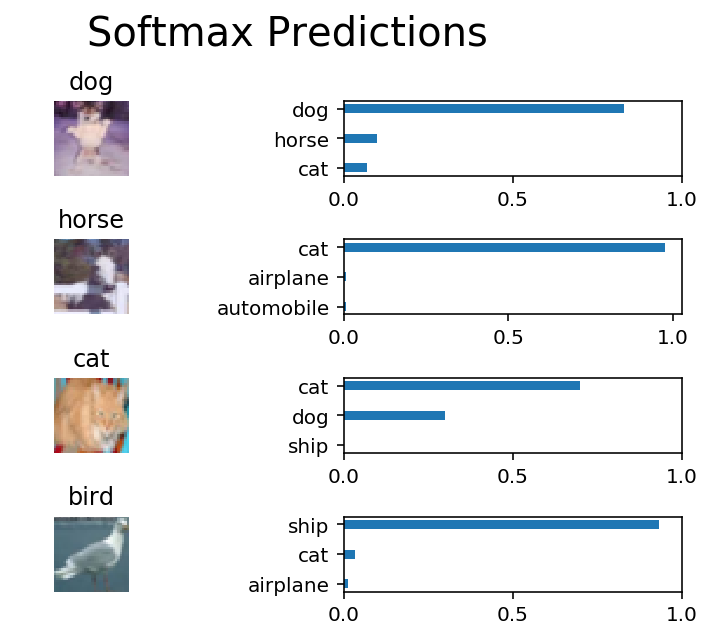

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.